In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import netCDF4 as nc
import os
import gc

In [2]:
import sys
sys.path.insert(0, "/data/SO2/SO24/ANDY/SOHI/Utils")

import Andy

In [3]:
XC = np.arange(-179.75, 180, 0.5)
YC = np.arange(-89.9, -55, 0.2)
RC = np.arange(-10, -3000, -20)

In [4]:
def swap(data):
#     return data
    if data.ndim == 3:
        return np.concatenate((data[:,:, 360:], data[:,:, :360]), axis=2)
    else:
        return np.concatenate((data[:, 360:], data[:, :360]), axis=1)

In [5]:
def running_mean(x, N=5):
    results = []
    hold = []
    
    for i in range(len(x)):
        hold.append(x[i])
        if len(hold) > N:
            hold.pop(0)
            
        results.append(np.nanmean(hold))
    
    return results

In [6]:
meopT = swap(np.load("data1/meop_T.npy"))
meopS = swap(np.load("data1/meop_S.npy"))
SOhiT = swap(np.load("data1/SOhi_T.npy"))
SOhiS = swap(np.load("data1/SOhi_S.npy"))
LLCT = swap(np.load("data1/LLC_T.npy"))
LLCS = swap(np.load("data1/LLC_S.npy"))
SOSET = swap(np.load("data1/SOSE_T.npy"))
SOSES = swap(np.load("data1/SOSE_S.npy"))
ECCOT = swap(np.load("data1/ECCO_T.npy"))
ECCOS = swap(np.load("data1/ECCO_S.npy"))

resampled_mask = np.load("data/regridded/Mask.npy")

In [46]:
meopT = meopT * resampled_mask[None,:,:]
meopS = meopS * resampled_mask[None,:,:]

SOhiT = SOhiT * resampled_mask[None,:,:]
SOhiS = SOhiS * resampled_mask[None,:,:]

LLCT = LLCT * resampled_mask[None,:,:]
LLCS = LLCS * resampled_mask[None,:,:]

SOSET = SOSET * resampled_mask[None,:,:]
SOSES = SOSES * resampled_mask[None,:,:]

ECCOT = ECCOT * resampled_mask[None,:,:]
ECCOS = ECCOS * resampled_mask[None,:,:]

In [100]:
def get(lon1, lon2):
    
    if lon1 < 0:
        lon1 = 360 - lon1
    if lon2 < 0:
        lon2 = 360 - lon2
        
    lon1 = lon1*2
    lon2 = lon2*2
    
    resT = []
    devT = []
    resS = []
    devS = []
    
    for d in range(len(dsetT)):
        res1 = dsetT[d][:,:, lon1:lon2]
        res2 = dsetS[d][:,:, lon1:lon2]
        
        resT.append(np.nanmean(res1, axis=(1,2)))
        resS.append(np.nanmean(res2, axis=(1,2)))
        
        devT.append(np.nanstd(res1, axis=(1,2)))
        devS.append(np.nanstd(res2, axis=(1,2)))
        
    return resT, devT, resS, devS

In [107]:
def plot(i, j):
    
    nT, dT, nS, dS = get(i,j)
    
    fig, ax = plt.subplots(figsize=(20,10), ncols=2)

    ax[0].plot(running_mean(nT[0][:40]), RC[:40],'--', c='gray', lw=3)
    ax[0].fill_betweenx(RC[:40], running_mean(nT[0][:40] - dT[0][:40]), running_mean(nT[0][:40] + dT[0][:40]), 
                            alpha=0.5, color='gray')

    ax[0].plot(running_mean(nT[1][:40]), RC[:40], c='k', lw=3)
    ax[0].errorbar(running_mean(nT[1][:40]), RC[:40],xerr=running_mean(dT[1][:40]), errorevery=4, 
                            color='k', capsize=8, lw=2, capthick=2)

    ax[0].plot(running_mean(nT[2][:40]), RC[:40], c='red', lw=3)
    ax[0].errorbar(running_mean(nT[2][:40]), RC[:40],xerr=running_mean(dT[2][:40]), errorevery=(1,4), 
                            color='red', capsize=8, lw=2, capthick=2)

    ax[0].plot(running_mean(nT[3][:40]), RC[:40], c='blue', lw=3)
    ax[0].errorbar(running_mean(nT[3][:40]), RC[:40],xerr=running_mean(dT[3][:40]), errorevery=(2,4), 
                            color='blue', capsize=8, lw=2, capthick=2)

    ax[0].plot(running_mean(nT[4][:40]), RC[:40], c='orange', lw=3)
    ax[0].errorbar(running_mean(nT[4][:40]), RC[:40],xerr=running_mean(dT[4][:40]), errorevery=(3,4), 
                            color='orange', capsize=8, lw=2, capthick=2)

    ## Salinity
    ax[1].plot(running_mean(nS[0][:40]), RC[:40],'--', c='gray', lw=3)
    ax[1].fill_betweenx(RC[:40], running_mean(nS[0][:40] - dS[0][:40]), running_mean(nS[0][:40] + dS[0][:40]), 
                            alpha=0.5, color='gray')

    ax[1].plot(running_mean(nS[1][:40]), RC[:40], c='k', lw=3)
    ax[1].errorbar(running_mean(nS[1][:40]), RC[:40],xerr=running_mean(dS[1][:40]), errorevery=4, 
                            color='k', capsize=8, lw=2, capthick=2)

    ax[1].plot(running_mean(nS[2][:40]), RC[:40], c='red', lw=3)
    ax[1].errorbar(running_mean(nS[2][:40]), RC[:40],xerr=running_mean(dS[2][:40]), errorevery=(1,4), 
                            color='red', capsize=8, lw=2, capthick=2)

    ax[1].plot(running_mean(nS[3][:40]), RC[:40], c='blue', lw=3)
    ax[1].errorbar(running_mean(nS[3][:40]), RC[:40],xerr=running_mean(dS[3][:40]), errorevery=(2,4), 
                            color='blue', capsize=8, lw=2, capthick=2)

    ax[1].plot(running_mean(nS[4][:40]), RC[:40], c='orange', lw=3)
    ax[1].errorbar(running_mean(nS[4][:40]), RC[:40],xerr=running_mean(dS[4][:40]), errorevery=(3,4), 
                            color='orange', capsize=8, lw=2, capthick=2)

    for a in ax.flat:
        a.grid()
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.tick_params(axis='both', labelsize=35)
        a.set_ylim(-800, 0)

        a.set_yticks([-700, -600, -500, -400, -300, -200, -100, 0])

    ax[0].set_xlim(-2,2)
    ax[0].set_xticks([-2, -1, 0, 1, 2])

    ax[1].set_xlim(33.4, 35)
    ax[1].set_xticks([33.4, 33.8, 34.2, 34.6, 35])

    plt.tight_layout(w_pad=10)
    
    return fig, ax

In [48]:
dsetT = [meopT, SOhiT, LLCT, SOSET, ECCOT]
dsetS = [meopS, SOhiS, LLCS, SOSES, ECCOS]

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


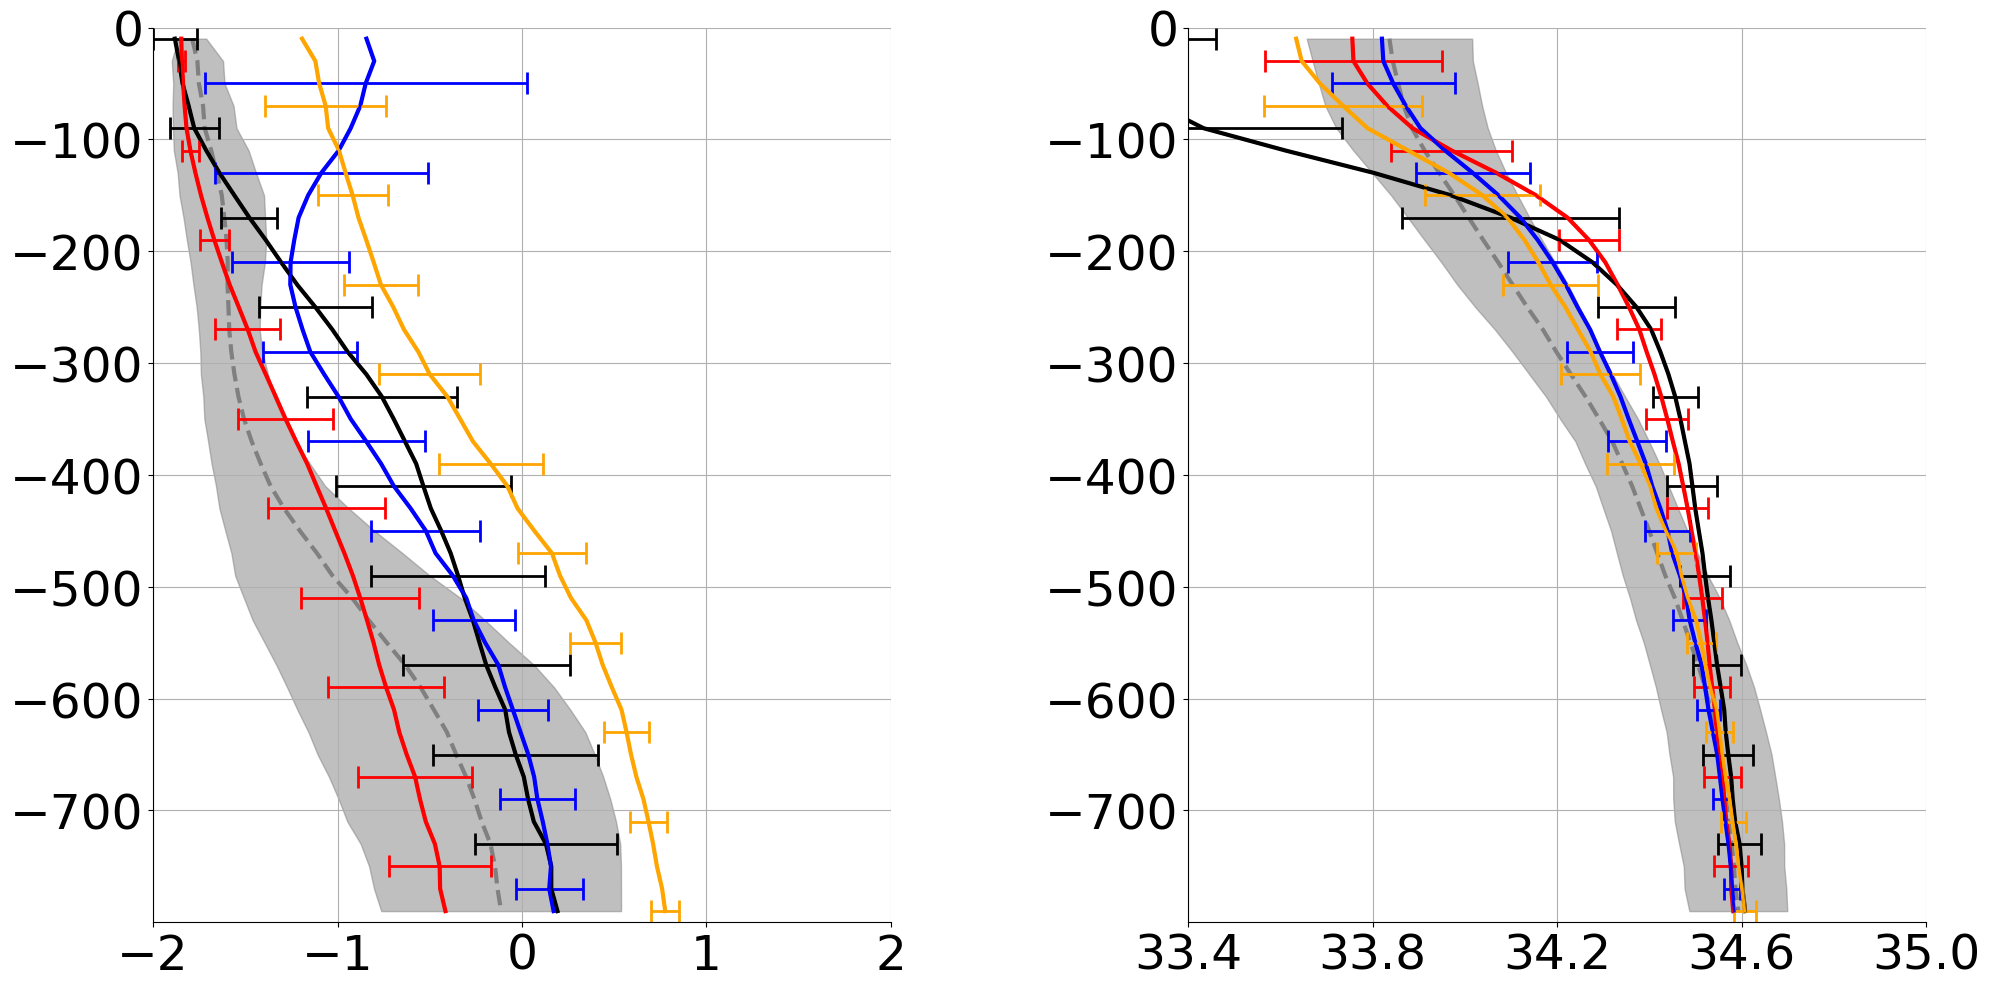

In [108]:
fig, ax = plot(30, 55)

plt.savefig(f"img5_profiles_binned/1.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


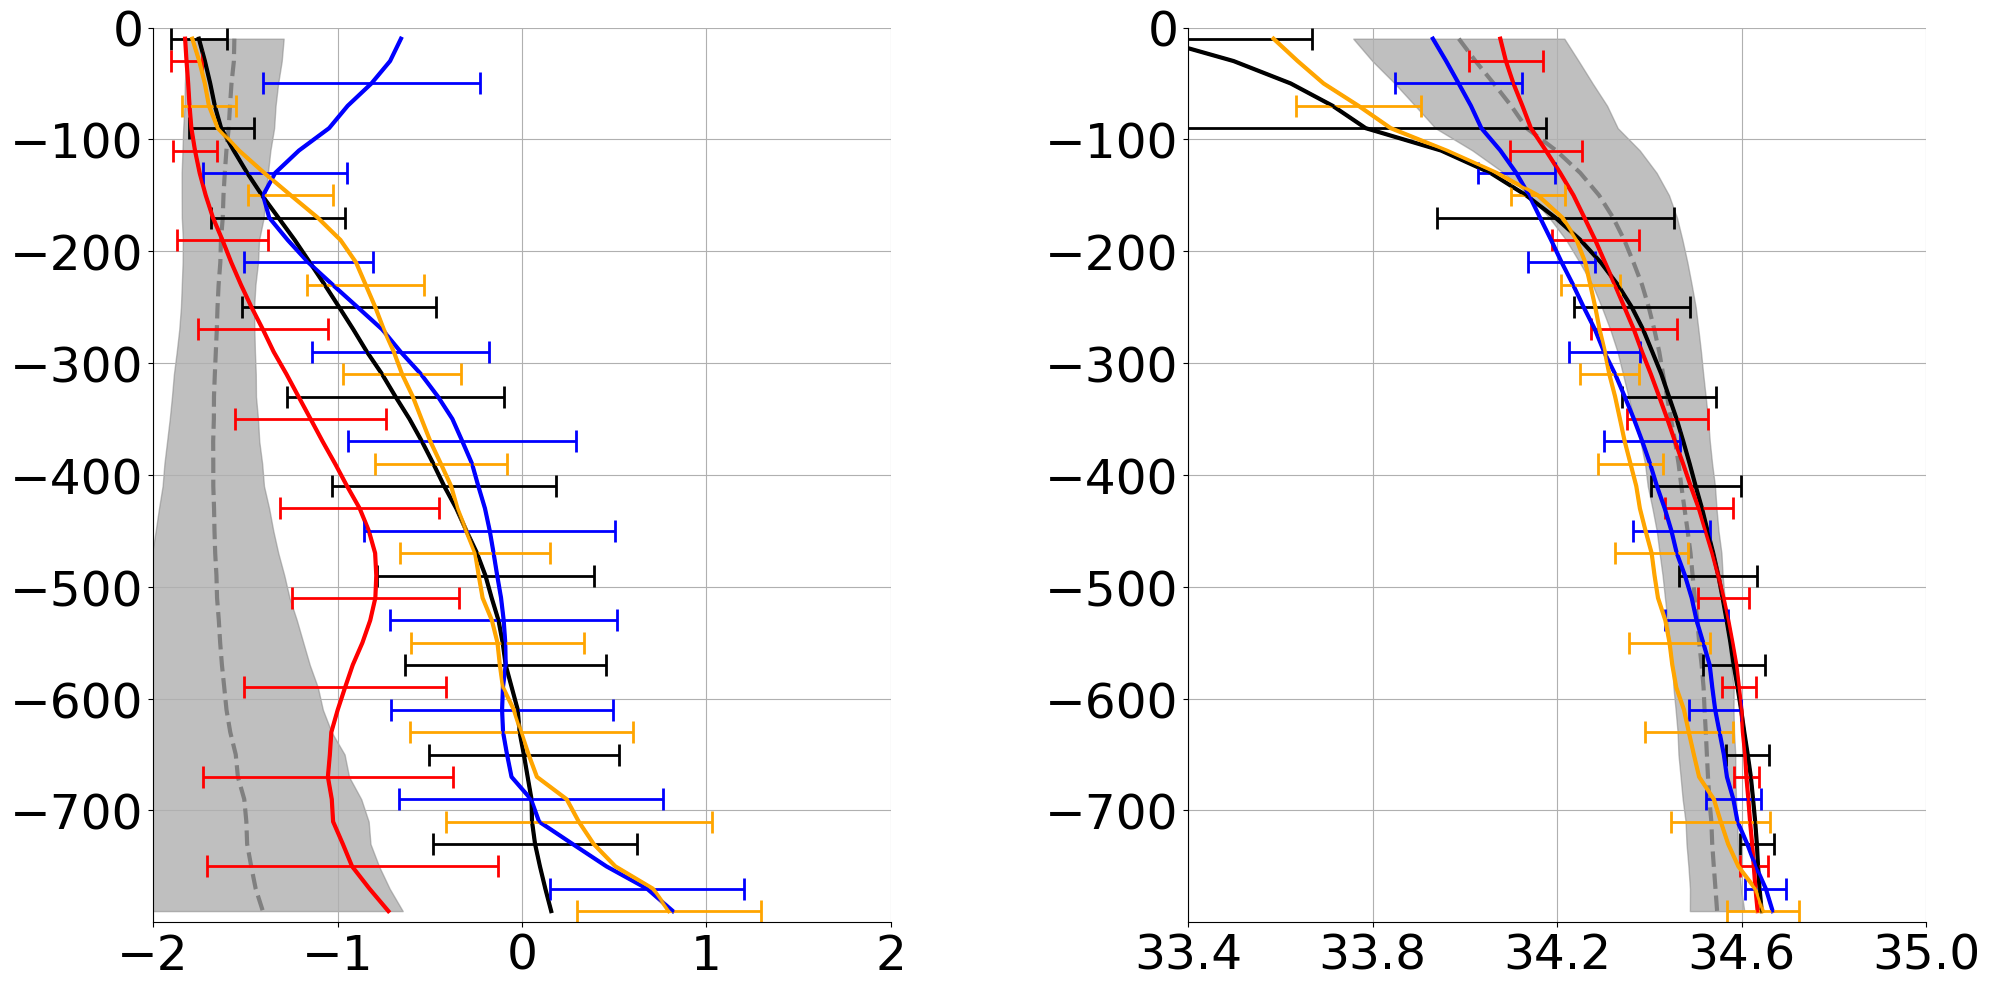

In [109]:
fig, ax = plot(69, 83)

plt.savefig(f"img5_profiles_binned/2.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


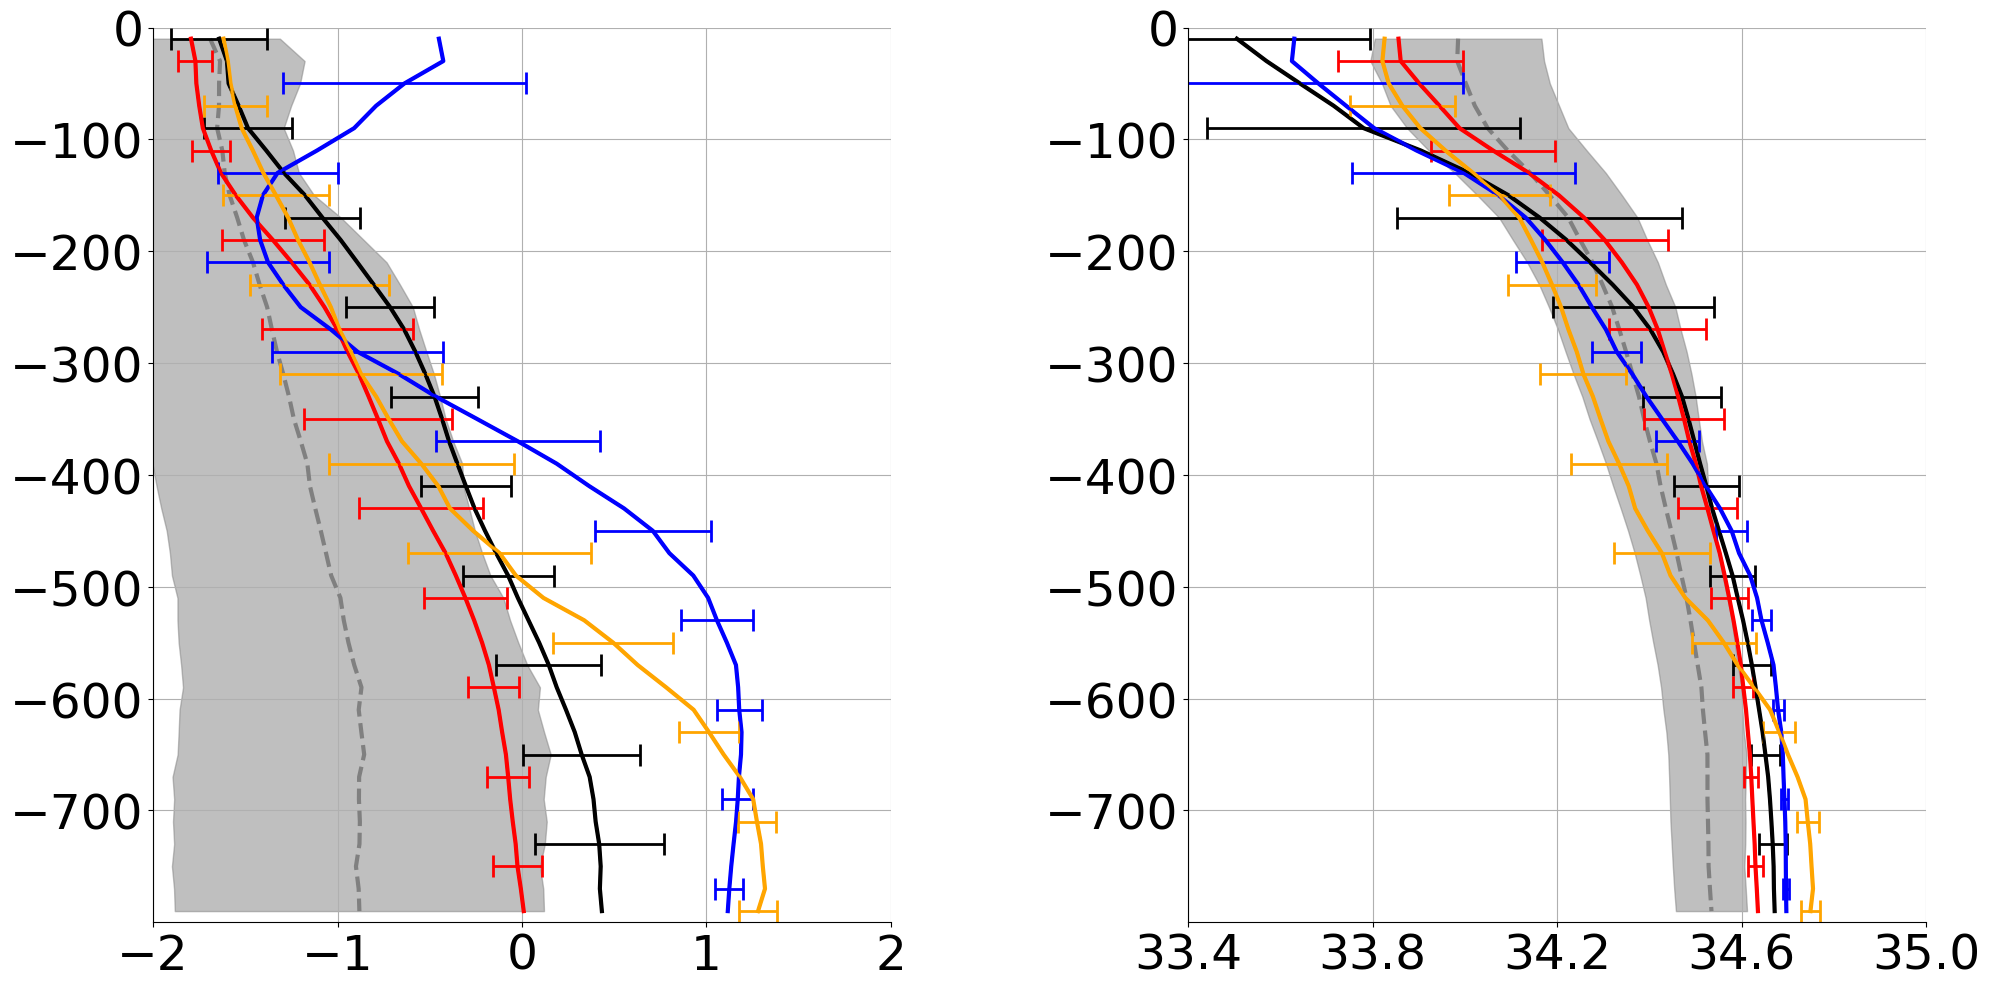

In [110]:
fig, ax = plot(105, 112)

plt.savefig(f"img5_profiles_binned/3.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


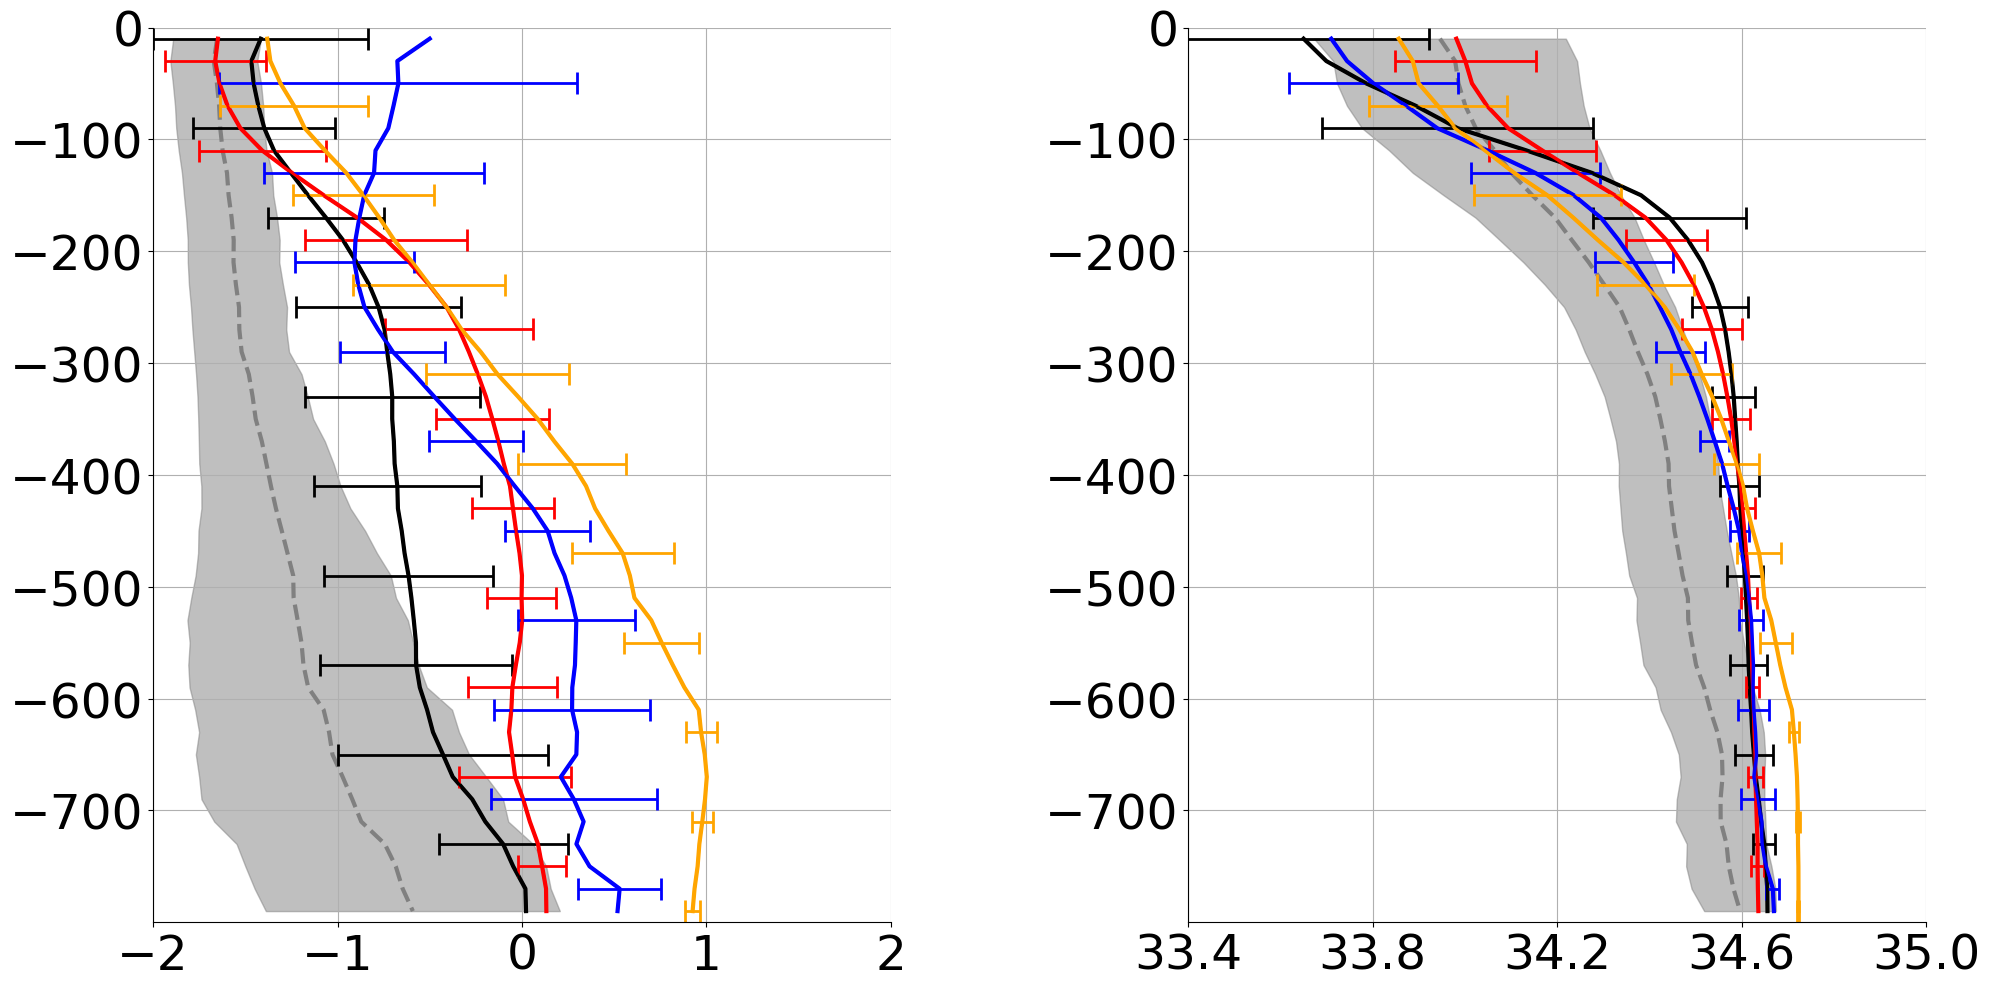

In [111]:
fig, ax = plot(130, 140)

plt.savefig(f"img5_profiles_binned/4.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


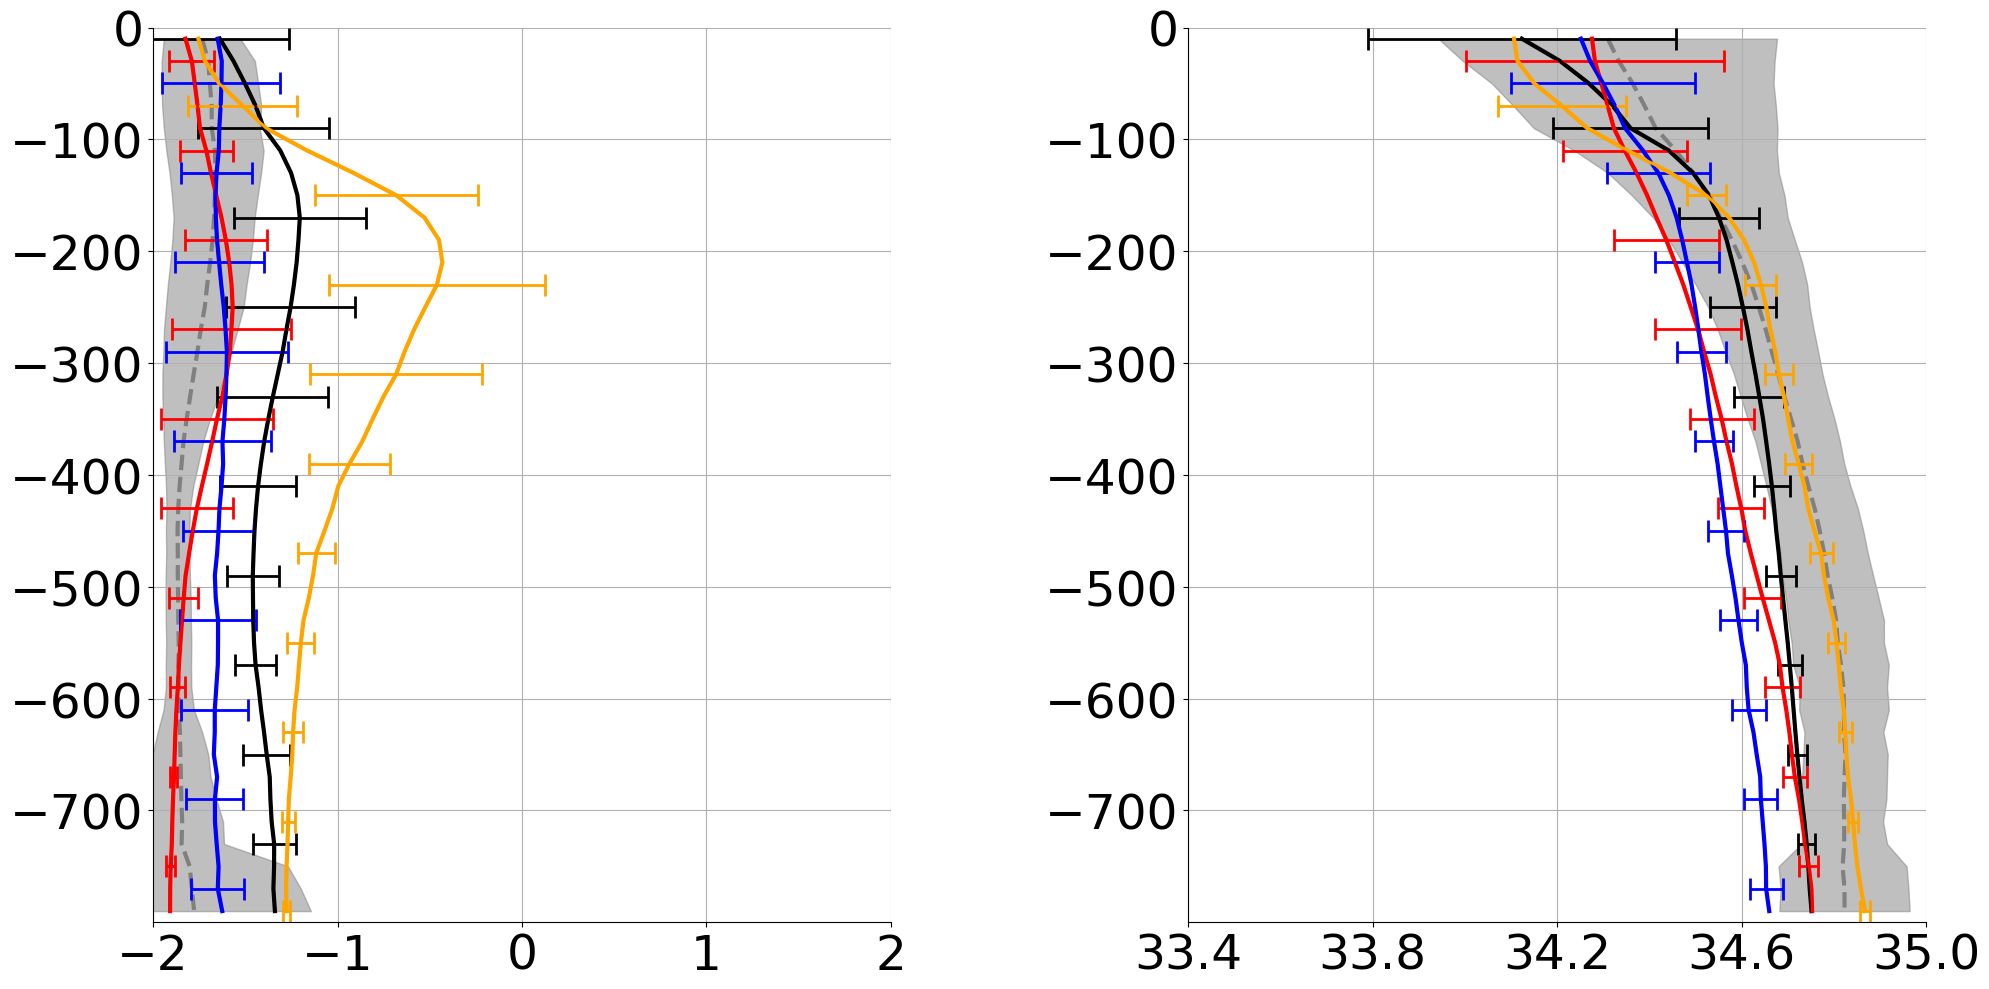

In [112]:
fig, ax = plot(160, 175)

plt.savefig(f"img5_profiles_binned/5.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


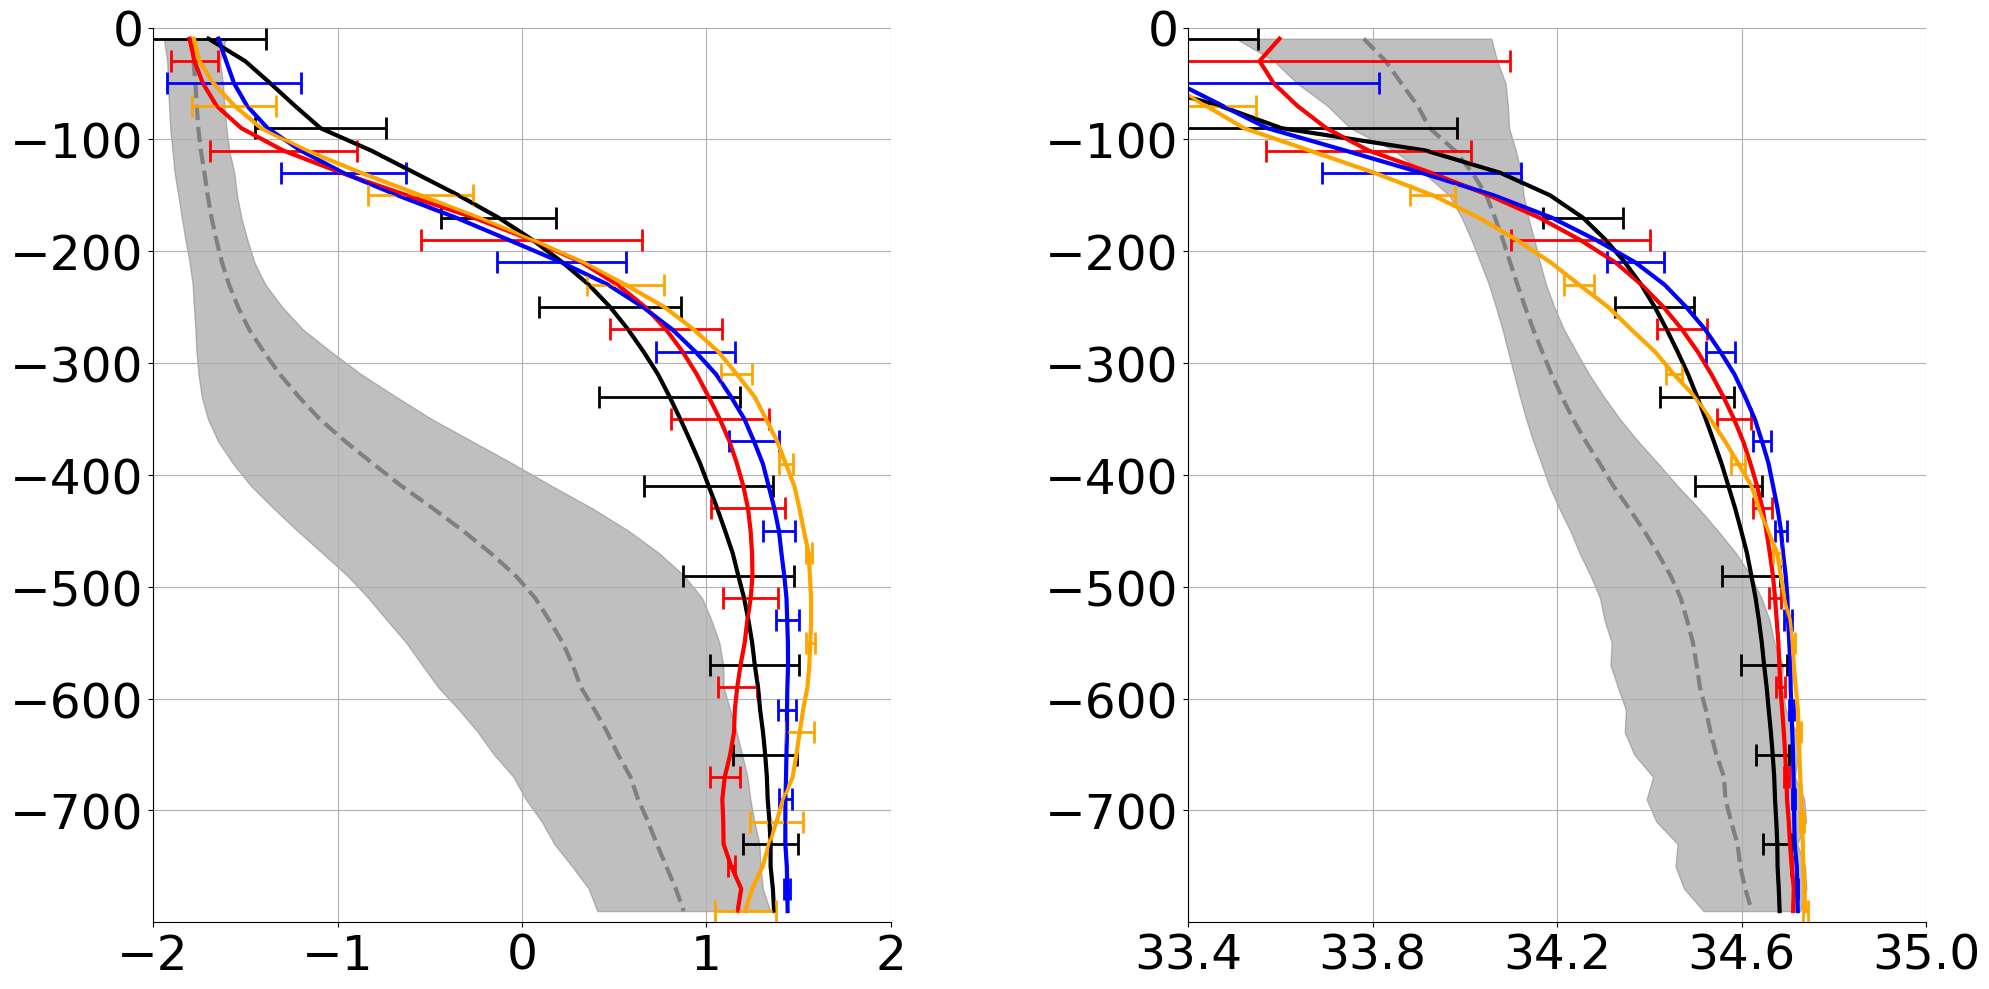

In [113]:
fig, ax = plot(242, 260)

plt.savefig(f"img5_profiles_binned/6.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


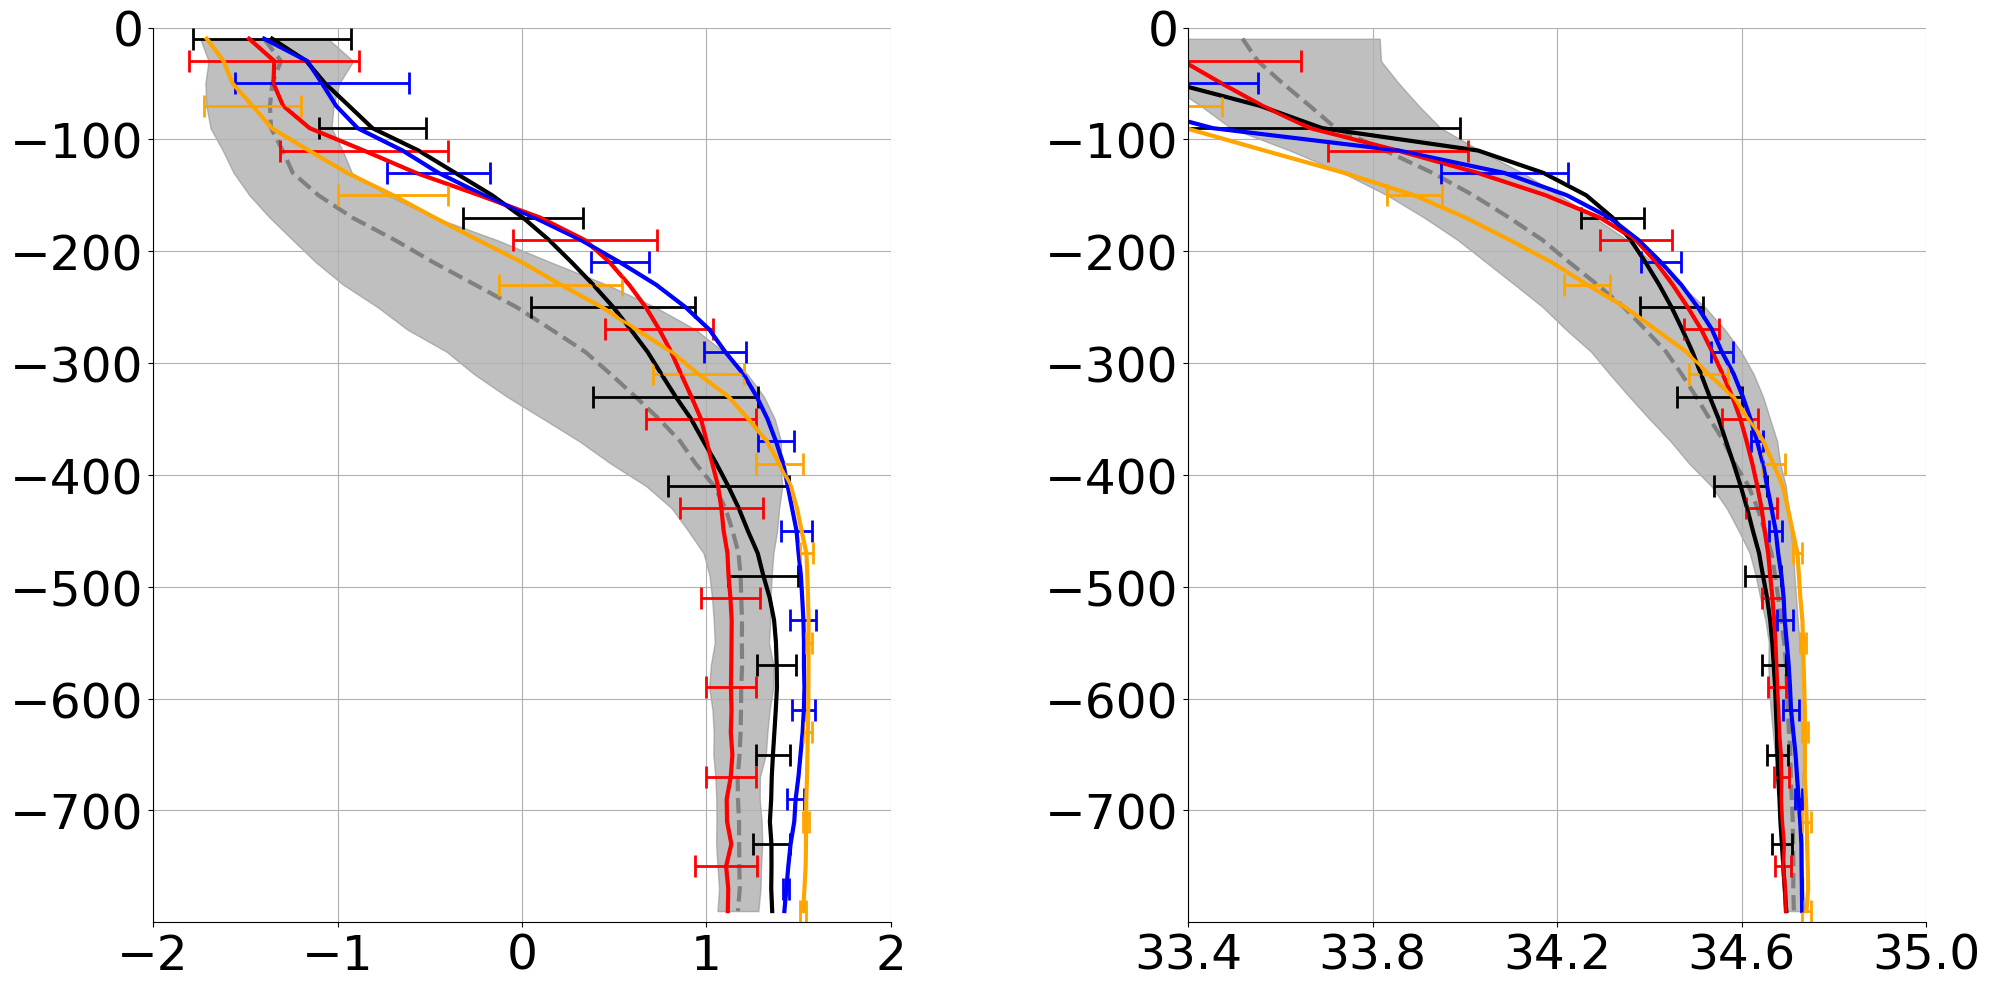

In [114]:
fig, ax = plot(265, 285)

plt.savefig(f"img5_profiles_binned/7.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


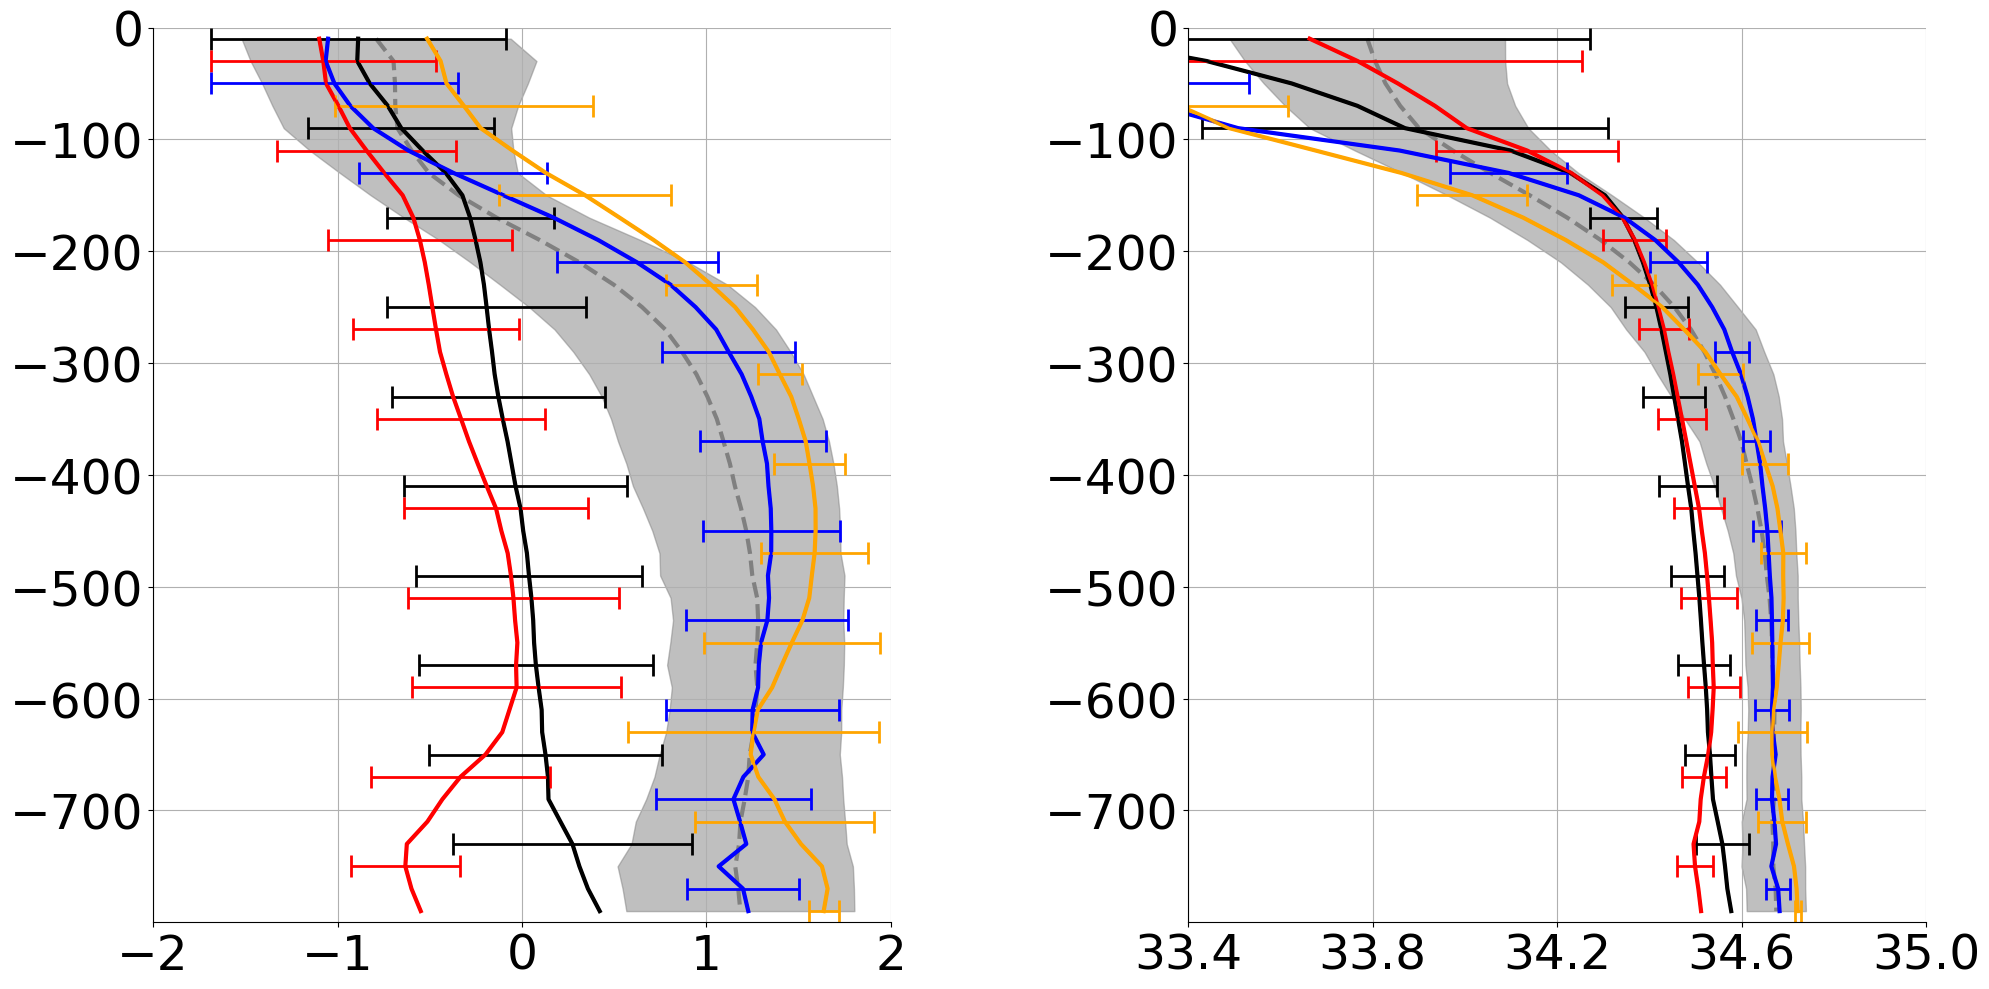

In [115]:
fig, ax = plot(285, 300)

plt.savefig(f"img5_profiles_binned/8.jpg", dpi=300)

/tmp/ipykernel_135343/3261210977.py:20: RuntimeWarning: Mean of empty slice
  resT.append(np.nanmean(res1, axis=(1,2)))
/tmp/ipykernel_135343/3261210977.py:21: RuntimeWarning: Mean of empty slice
  resS.append(np.nanmean(res2, axis=(1,2)))
/home/a4dinh/.conda/envs/tracers/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


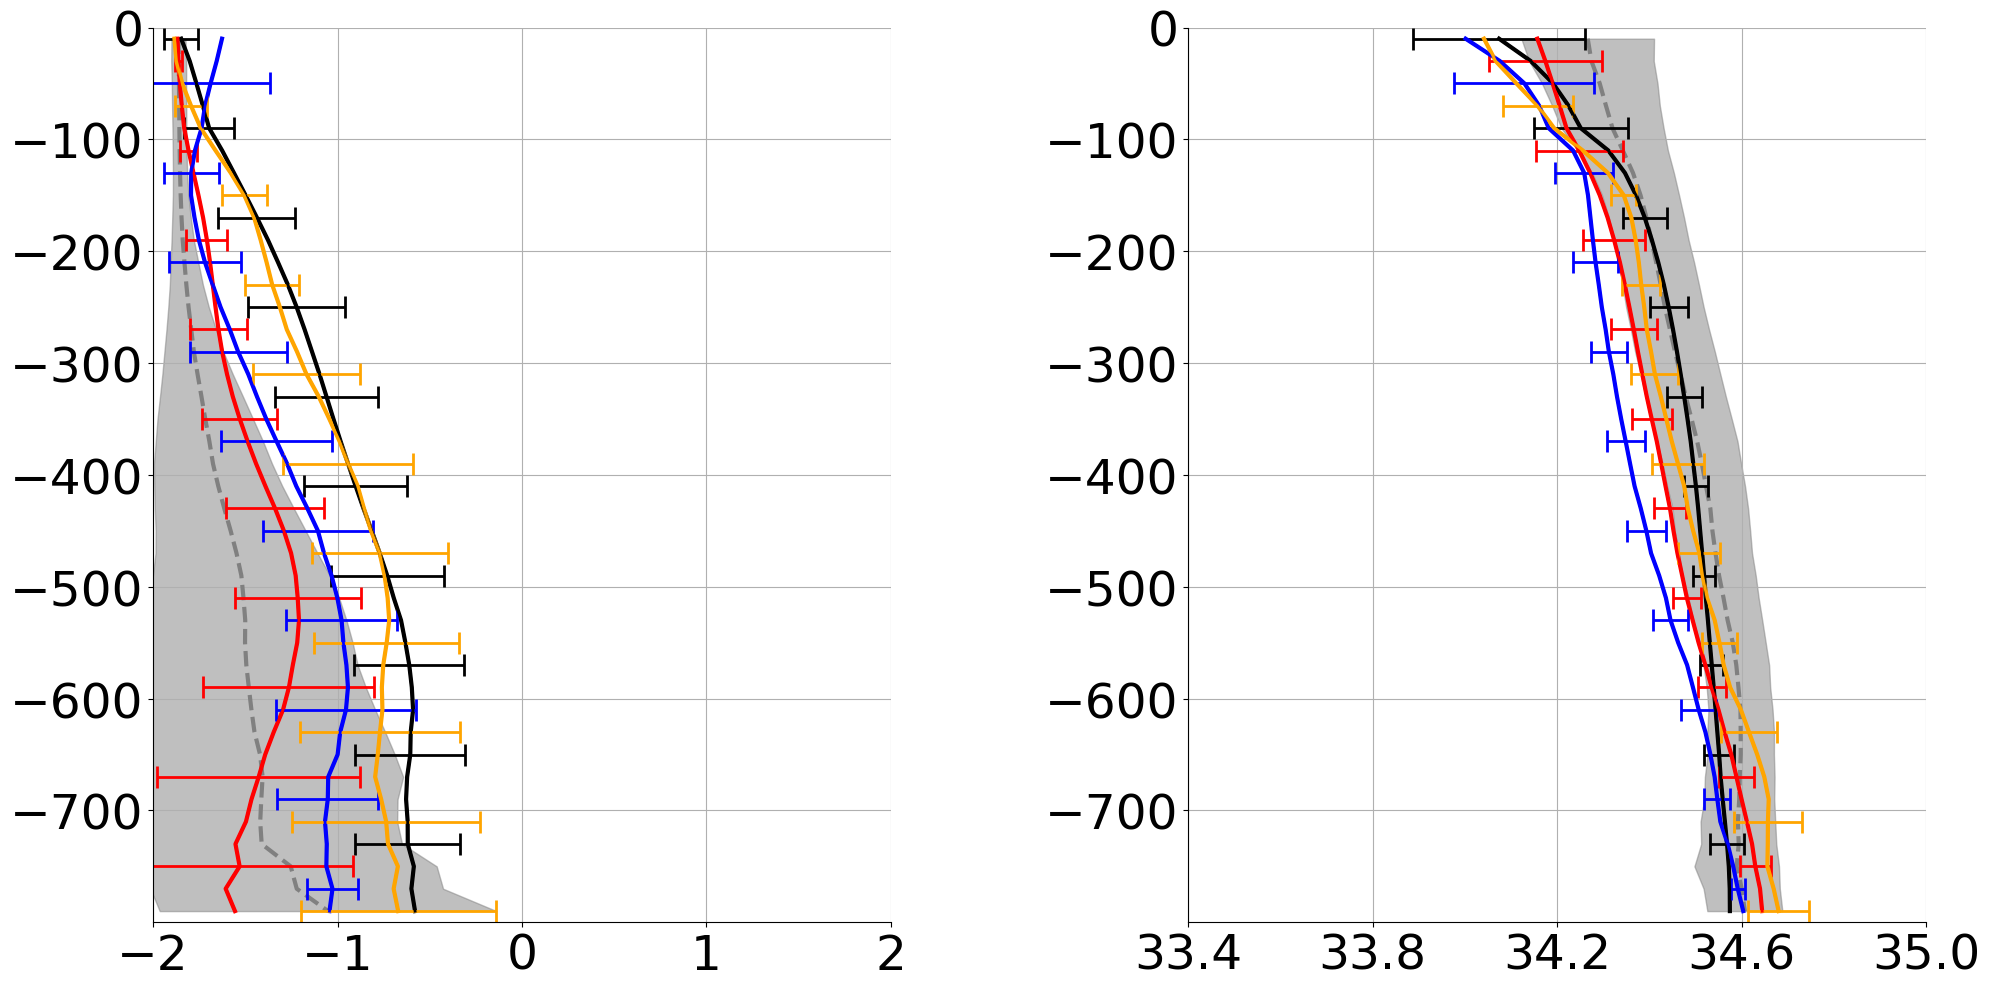

In [116]:
fig, ax = plot(318, 335)

plt.savefig(f"img5_profiles_binned/9.jpg", dpi=300)

## Vertical Slice

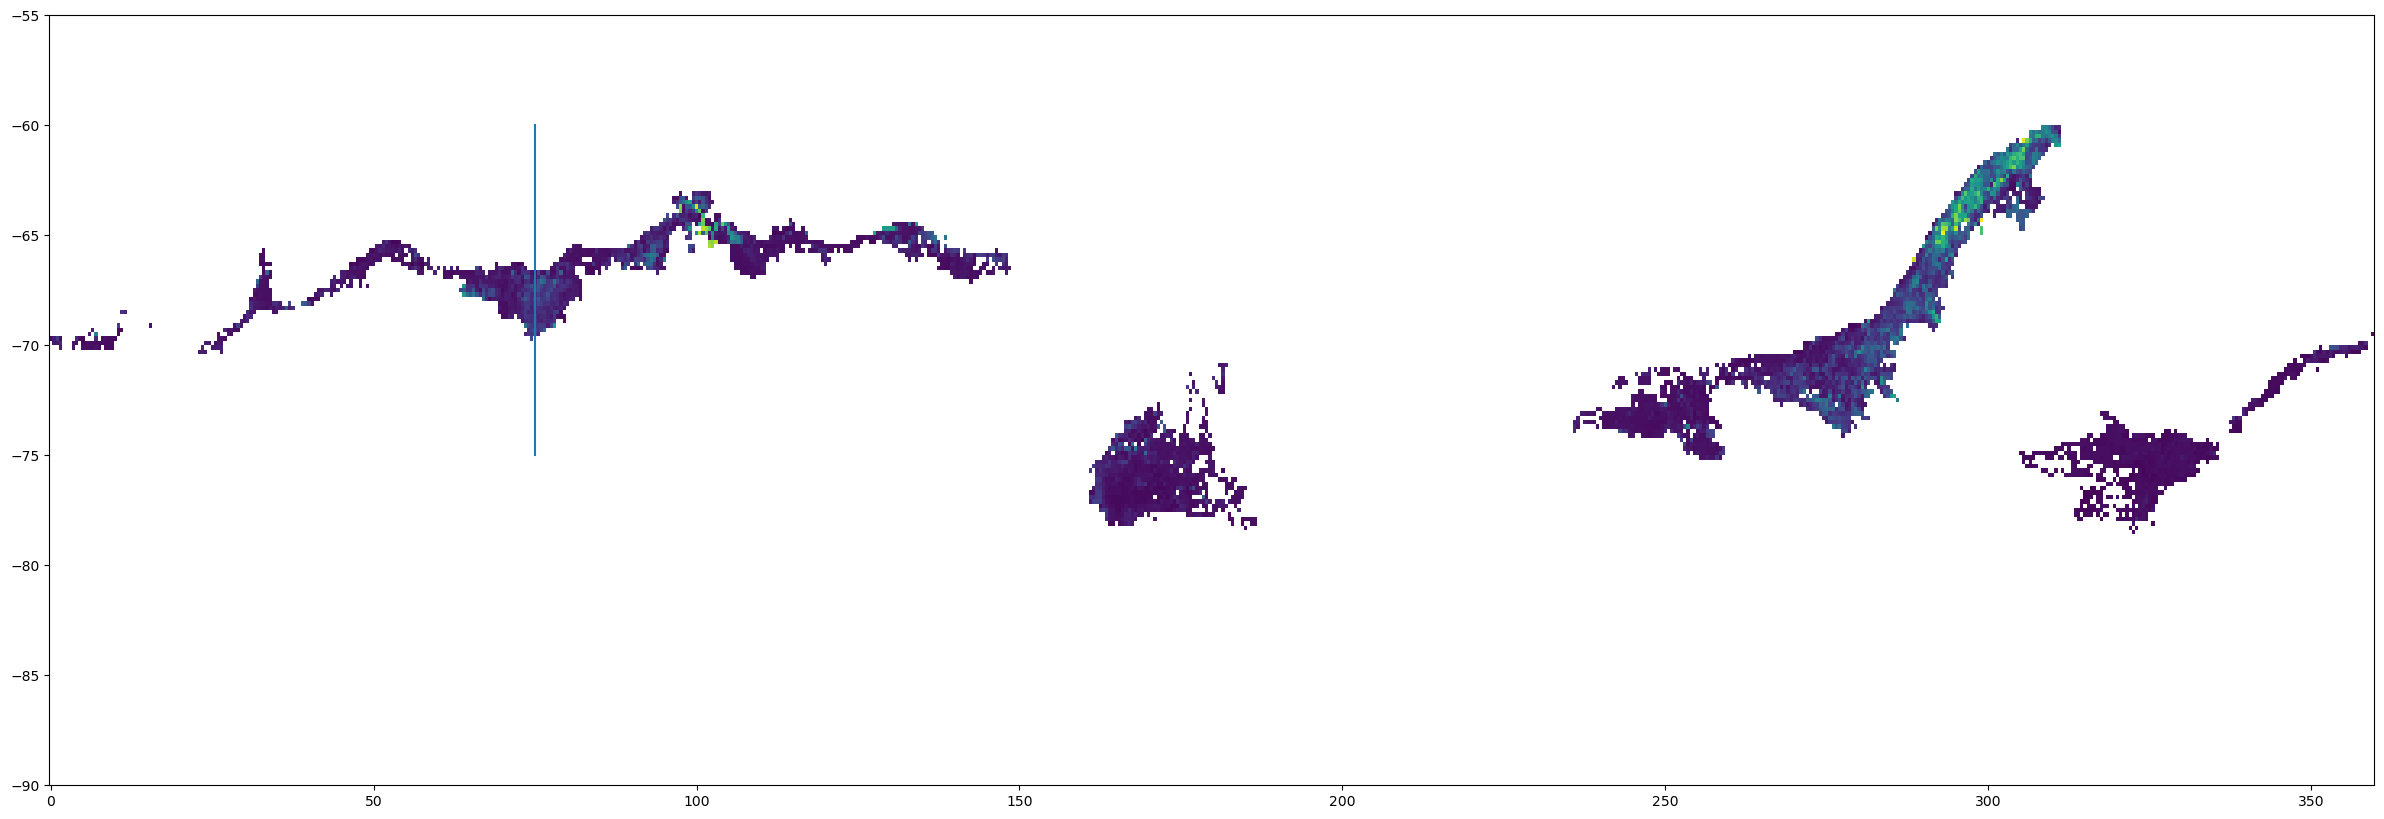

In [13]:
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(np.arange(0, 360, 0.5), YC, meopT[0])
ax.plot([75, 75],[-75, -60])

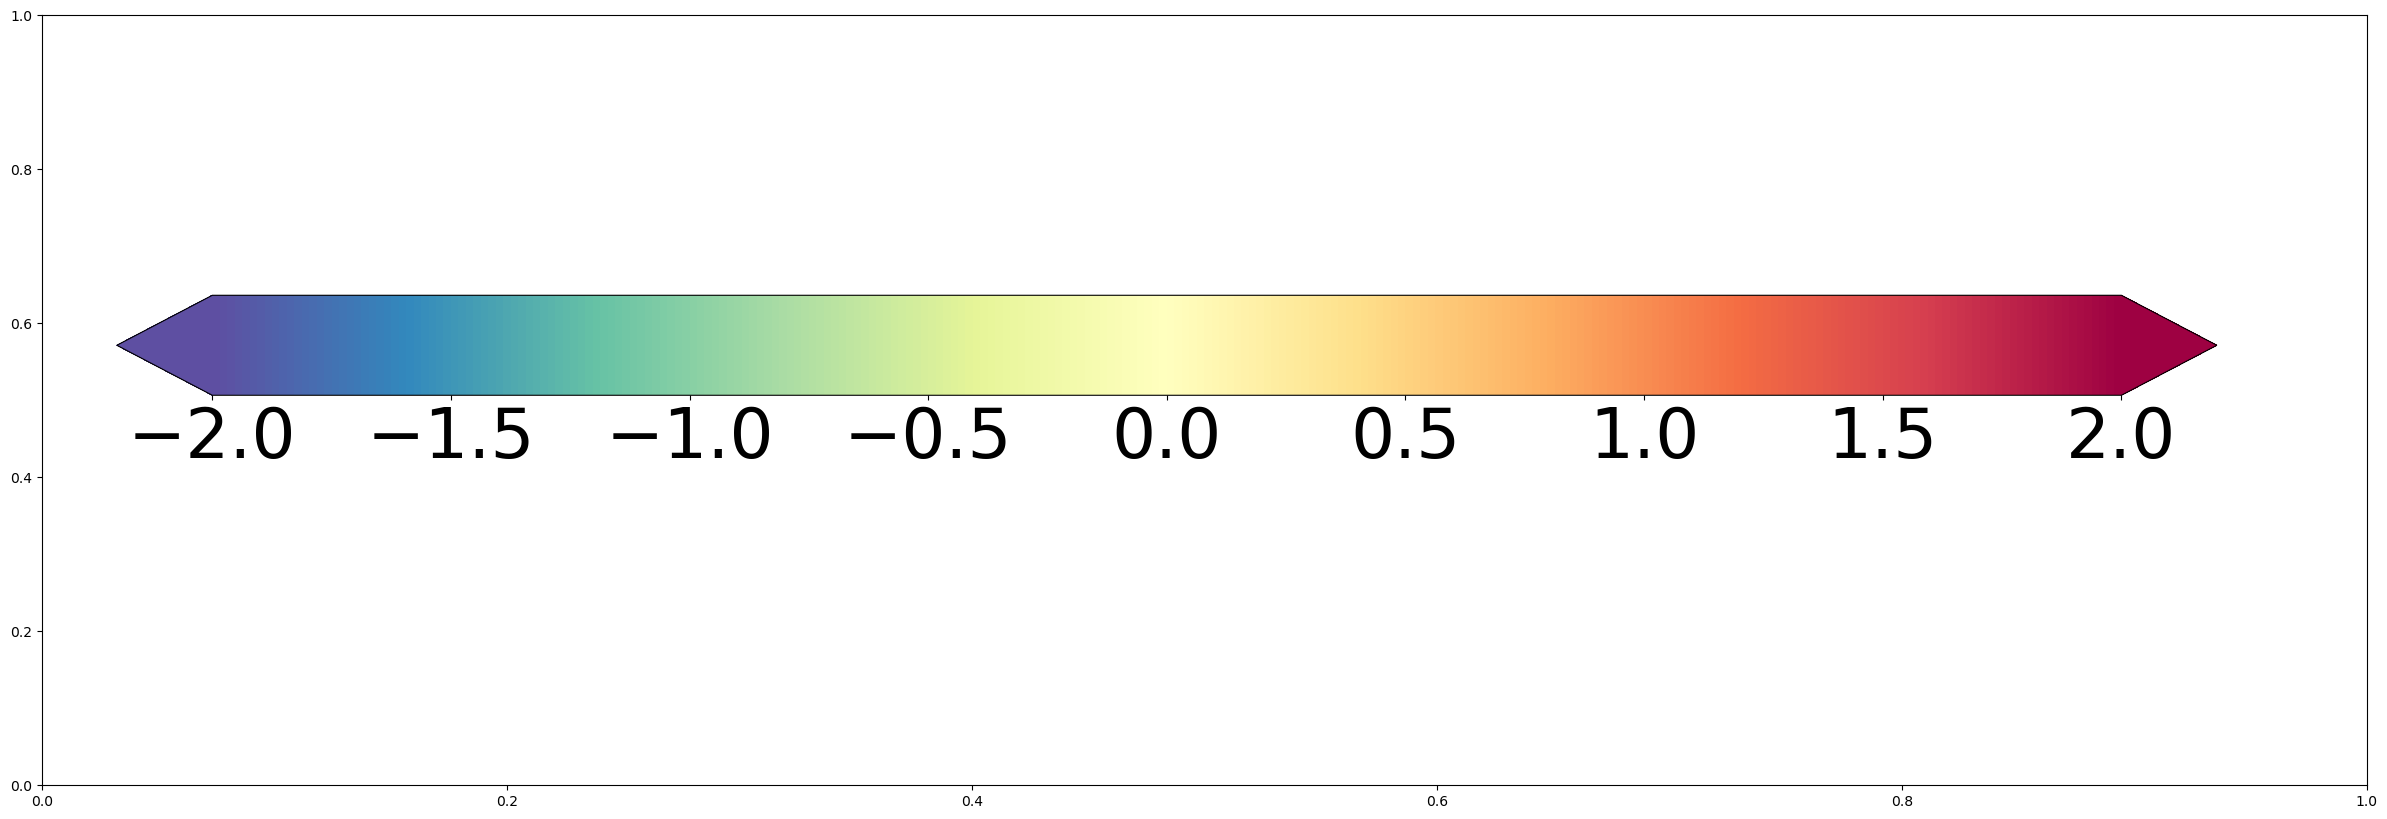

In [62]:
fig, ax = plt.subplots(figsize=(30,10))
# Horizontal
cbar_ax = fig.add_axes([0.15, 0.5, 0.7, 0.1])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal', extend='both')
cbar.ax.set_xlabel(f'', size=20)
cbar.ax.tick_params(labelsize=50)

plt.savefig(f"img6_vertical_slice/cb.jpg", dpi=300)

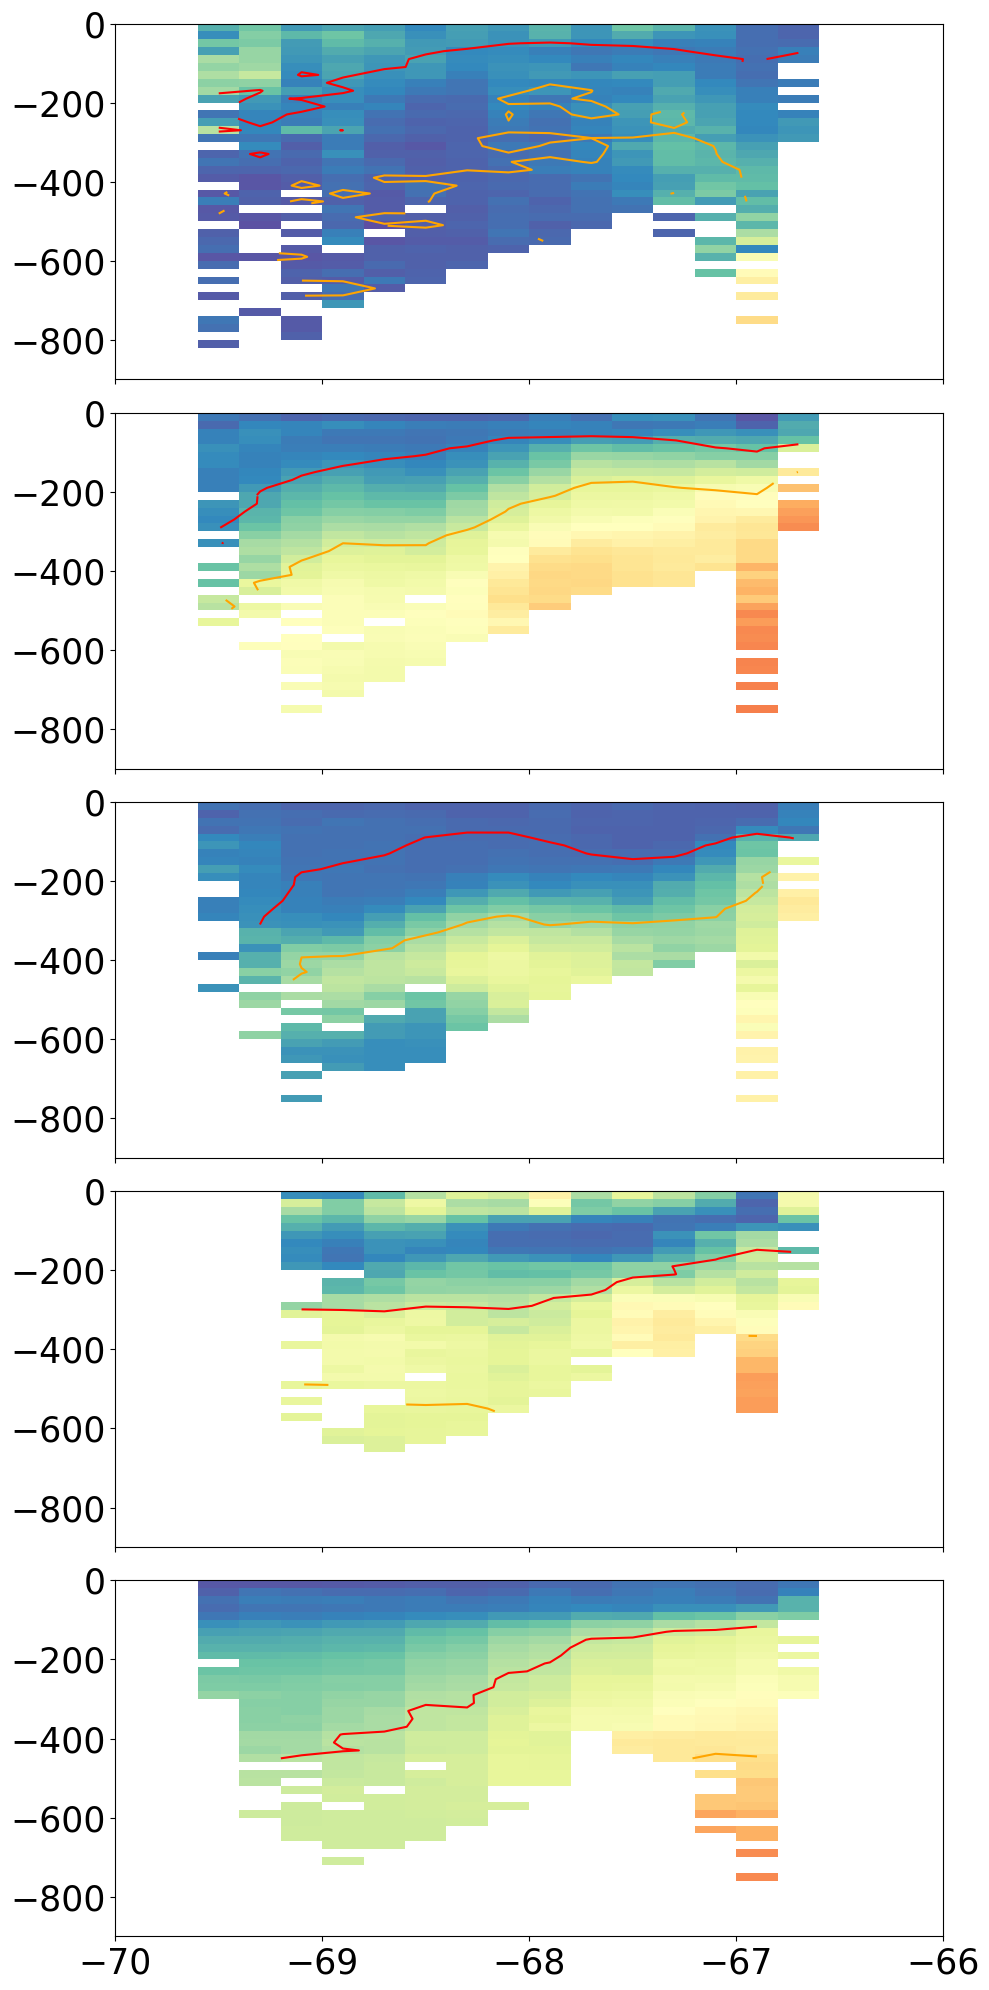

In [56]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5, sharex=True)

im=ax[0].pcolormesh(YC[:], RC, meopT[:,:,75*2], cmap='Spectral_r', vmin=-2, vmax=2)
ax[0].contour(YC[:], RC, meopS[:,:,75*2], levels=[34.3, 34.5, 34.7], colors=['red', 'orange'])

ax[1].pcolormesh(YC[:], RC, SOhiT[:,:,75*2], cmap='Spectral_r', vmin=-2, vmax=2)
ax[1].contour(YC[:], RC, SOhiS[:,:,75*2], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[2].pcolormesh(YC[:], RC, LLCT[:,:,75*2], cmap='Spectral_r', vmin=-2, vmax=2)
ax[2].contour(YC[:], RC, LLCS[:,:,75*2], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[3].pcolormesh(YC[:], RC, SOSET[:,:,75*2], cmap='Spectral_r', vmin=-2, vmax=2)
ax[3].contour(YC[:], RC, SOSES[:,:,75*2], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[4].pcolormesh(YC[:], RC, ECCOT[:,:,75*2], cmap='Spectral_r', vmin=-2, vmax=2)
ax[4].contour(YC[:], RC, ECCOS[:,:,75*2], levels=[34.3, 34.5], colors=['red', 'orange'])

for a in ax.flat:
    a.set_xlim(-70, -66)
    a.set_ylim(-900, 0)
    a.tick_params(axis='both', labelsize=25)
    
plt.tight_layout()
plt.savefig(f"img6_vertical_slice/amery.jpg", dpi=300)

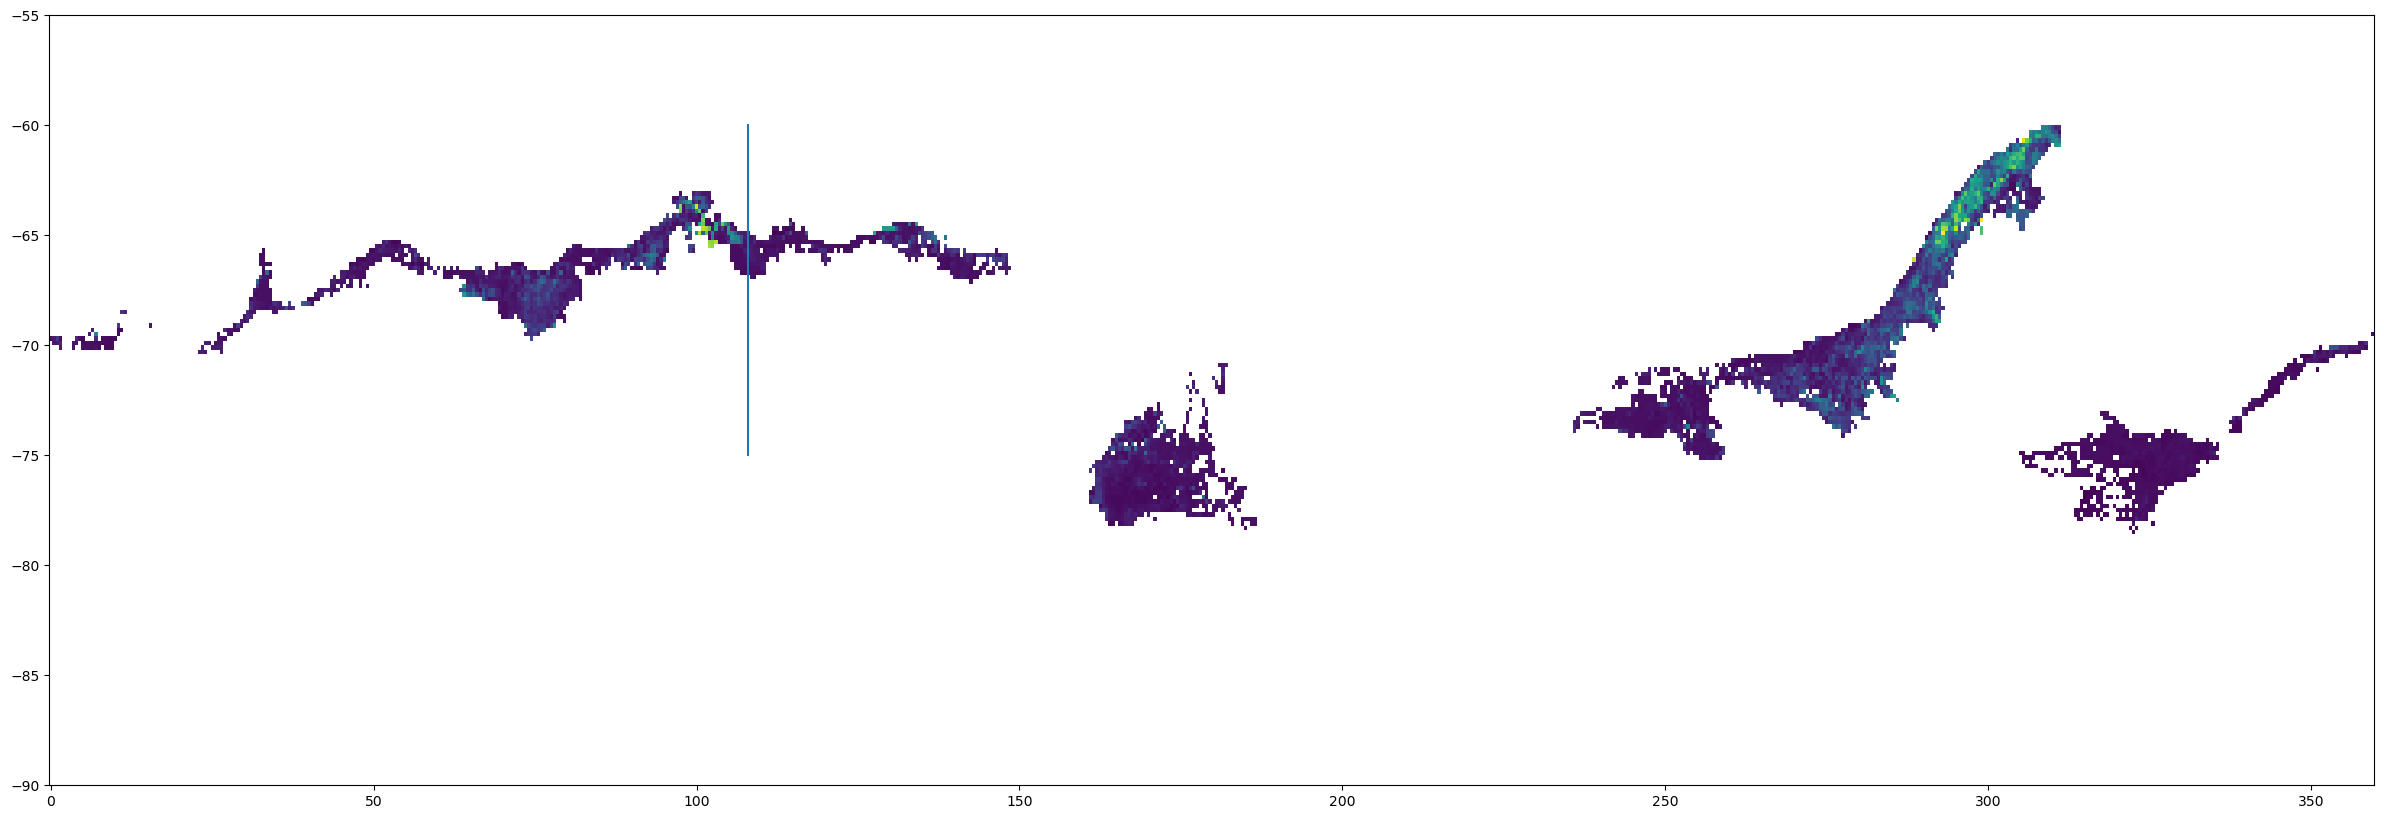

In [66]:
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(np.arange(0, 360, 0.5), YC, meopT[0])
ax.plot([108, 108],[-75, -60])

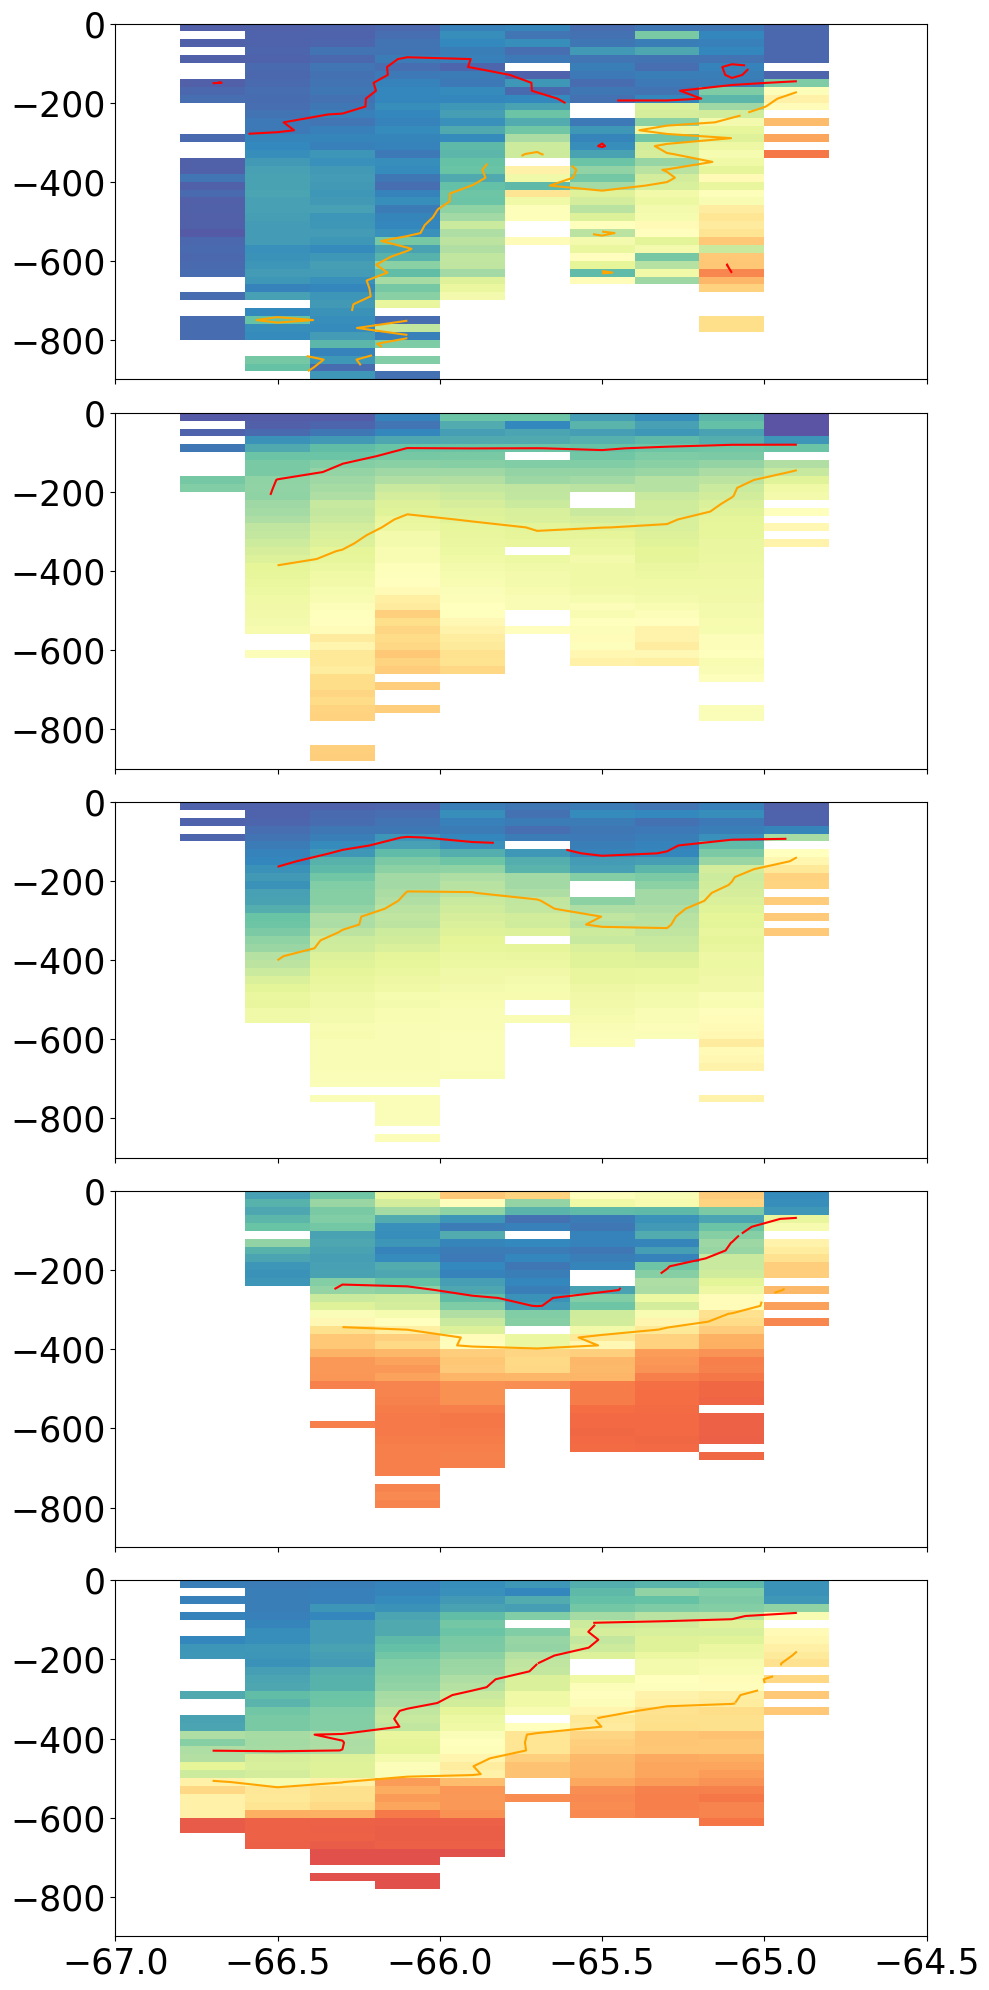

In [95]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5, sharex=True)

l = 108*2

im=ax[0].pcolormesh(YC[:], RC, meopT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[0].contour(YC[:], RC, meopS[:,:,l], levels=[34.3, 34.5, 34.7], colors=['red', 'orange'])

ax[1].pcolormesh(YC[:], RC, SOhiT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[1].contour(YC[:], RC, SOhiS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[2].pcolormesh(YC[:], RC, LLCT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[2].contour(YC[:], RC, LLCS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[3].pcolormesh(YC[:], RC, SOSET[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[3].contour(YC[:], RC, SOSES[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[4].pcolormesh(YC[:], RC, ECCOT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[4].contour(YC[:], RC, ECCOS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

for a in ax.flat:
    a.set_xlim(-67, -64.5)
    a.set_ylim(-900, 0)
    a.tick_params(axis='both', labelsize=25)
    
plt.tight_layout()
plt.savefig(f"img6_vertical_slice/vincennes.jpg", dpi=300)

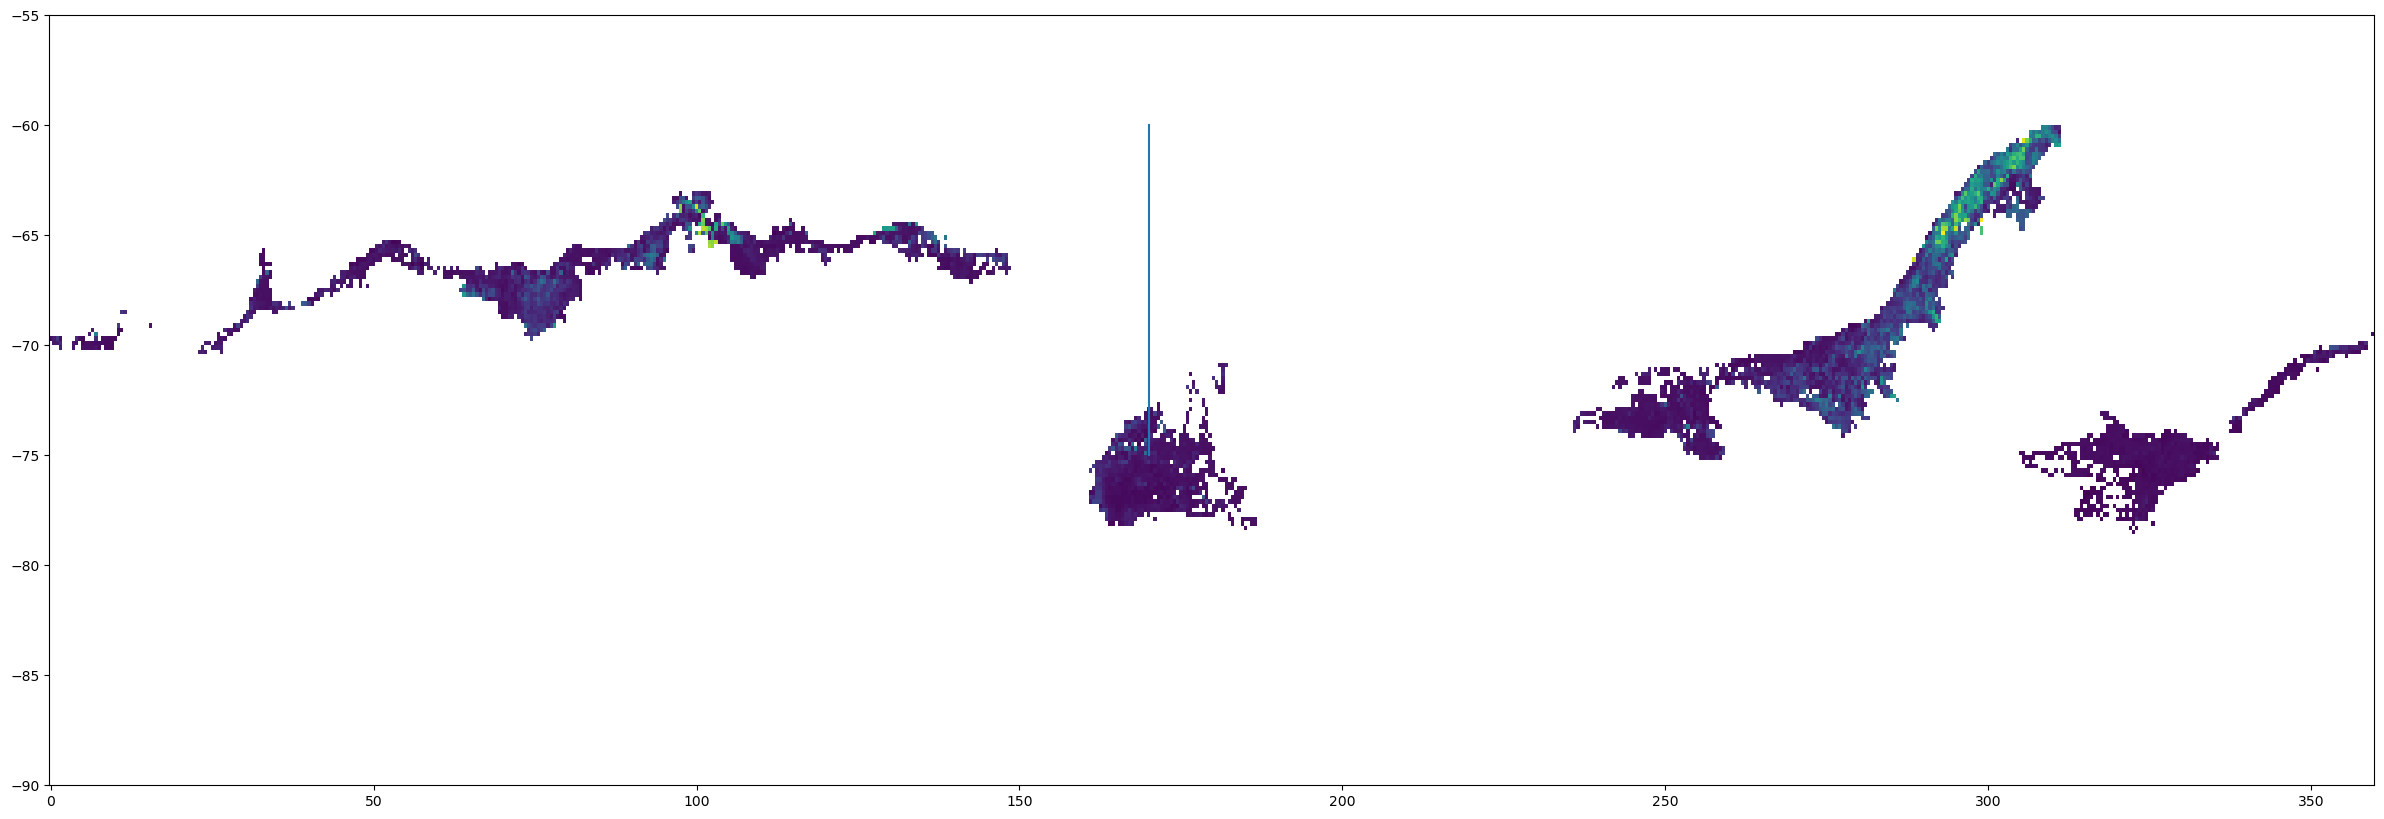

In [70]:
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(np.arange(0, 360, 0.5), YC, meopT[0])
ax.plot([170, 170],[-75, -60])

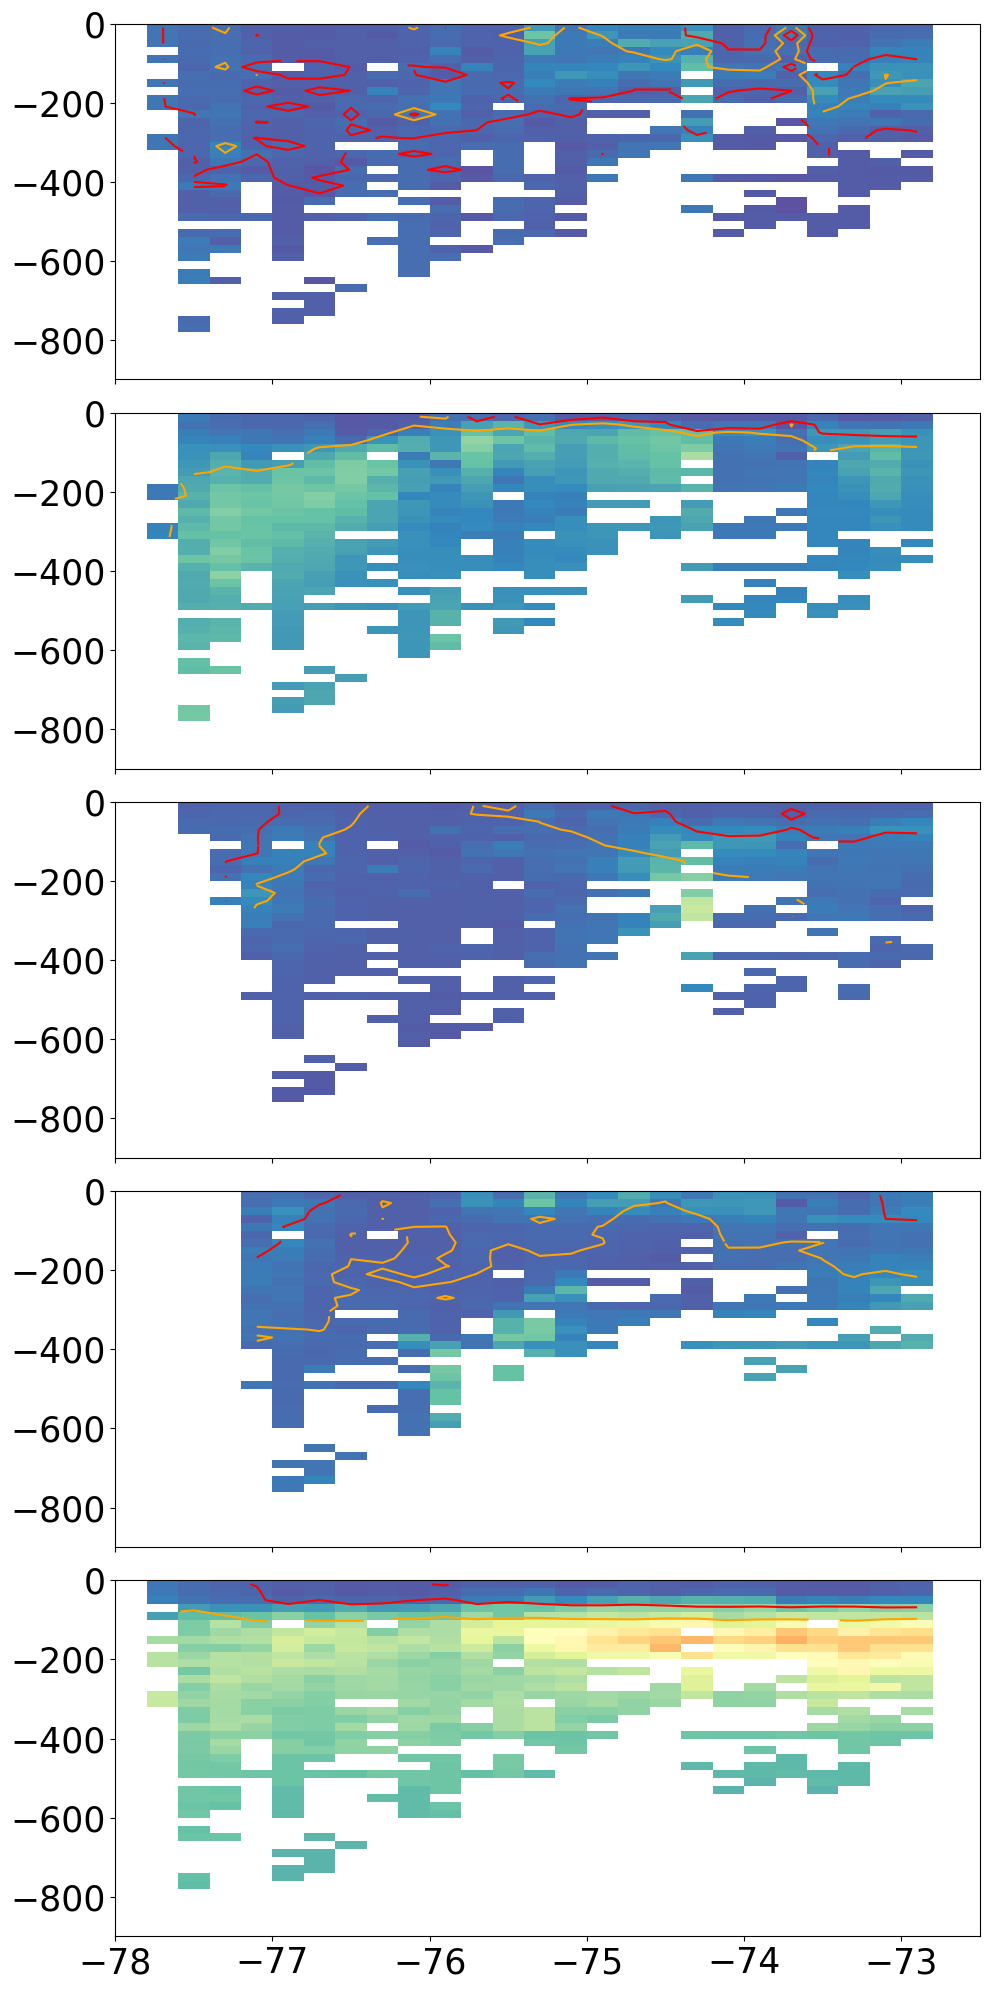

In [77]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5, sharex=True)

l = 170*2

im=ax[0].pcolormesh(YC[:], RC, meopT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[0].contour(YC[:], RC, meopS[:,:,l], levels=[34.3, 34.5, 34.7], colors=['red', 'orange'])

ax[1].pcolormesh(YC[:], RC, SOhiT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[1].contour(YC[:], RC, SOhiS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[2].pcolormesh(YC[:], RC, LLCT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[2].contour(YC[:], RC, LLCS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[3].pcolormesh(YC[:], RC, SOSET[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[3].contour(YC[:], RC, SOSES[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[4].pcolormesh(YC[:], RC, ECCOT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[4].contour(YC[:], RC, ECCOS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

for a in ax.flat:
    a.set_xlim(-78, -72.5)
    a.set_ylim(-900, 0)
    a.tick_params(axis='both', labelsize=25)
    
plt.tight_layout()
plt.savefig(f"img6_vertical_slice/ross.jpg", dpi=300)

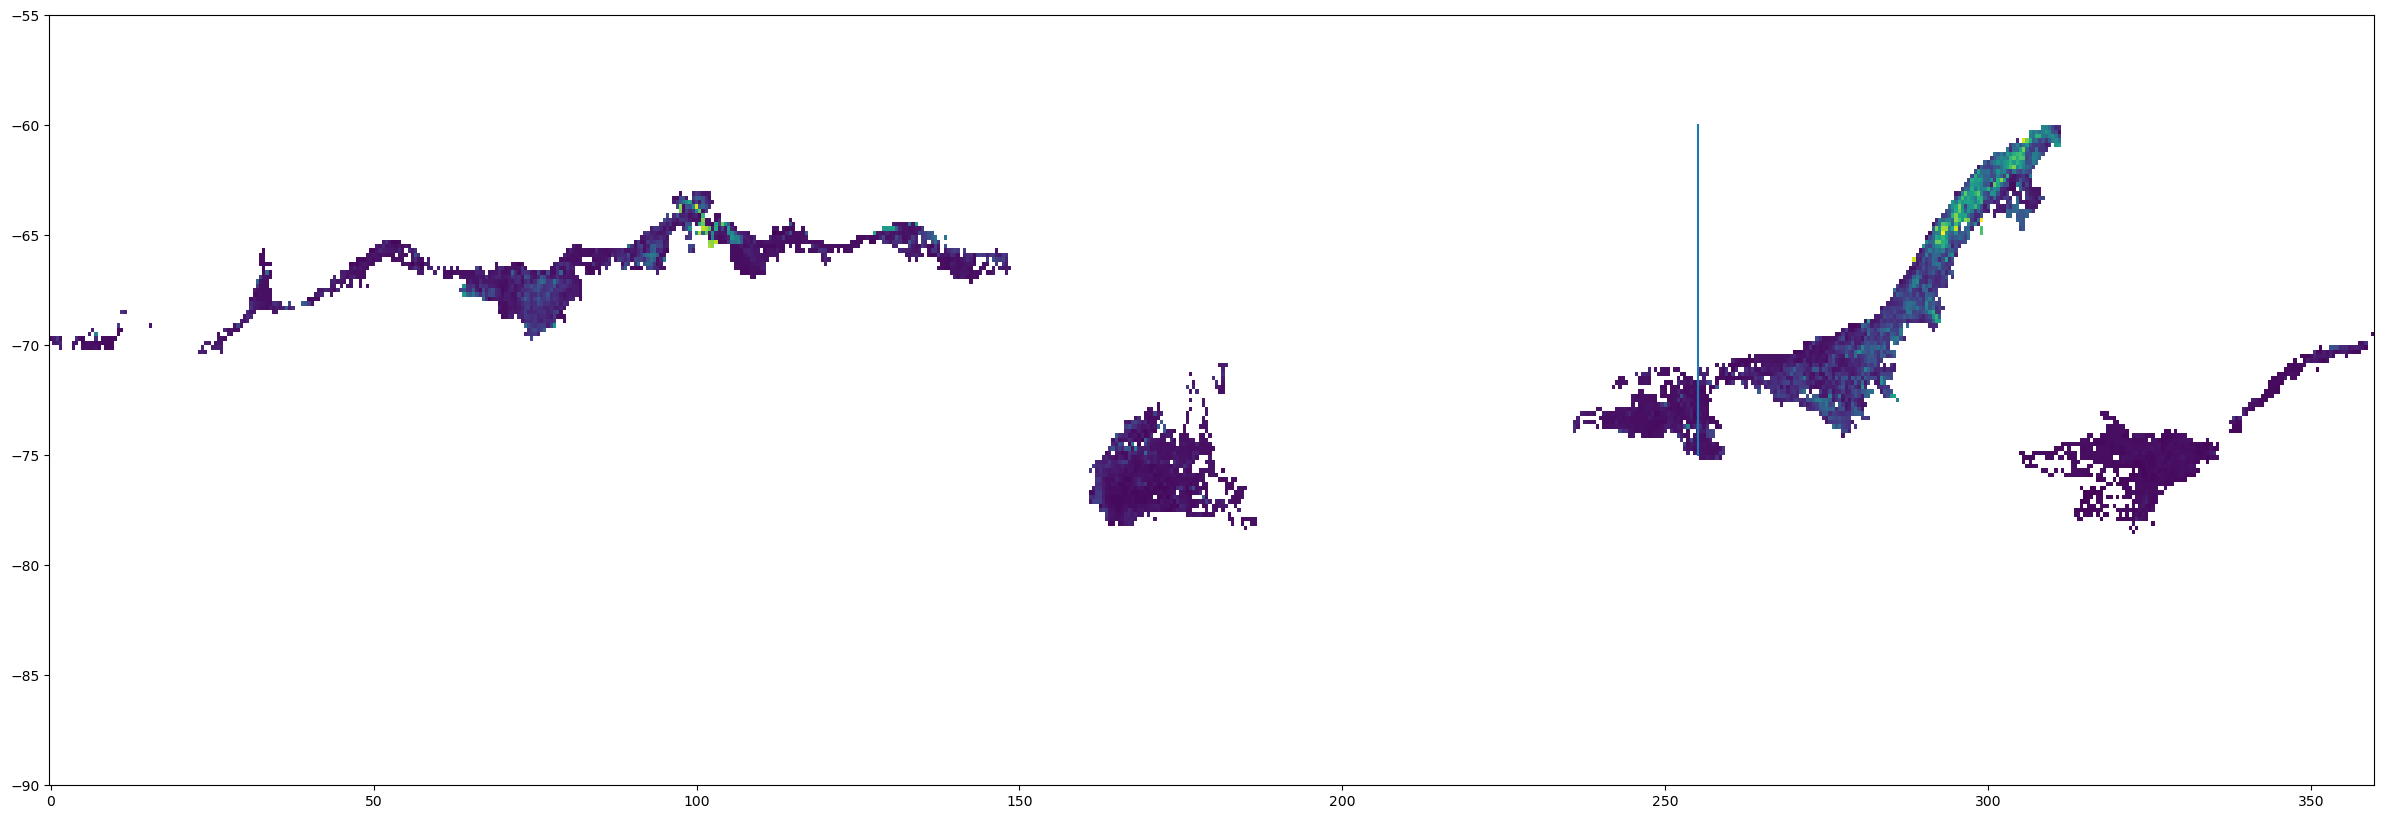

In [80]:
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(np.arange(0, 360, 0.5), YC, meopT[0])
ax.plot([255, 255],[-75, -60])

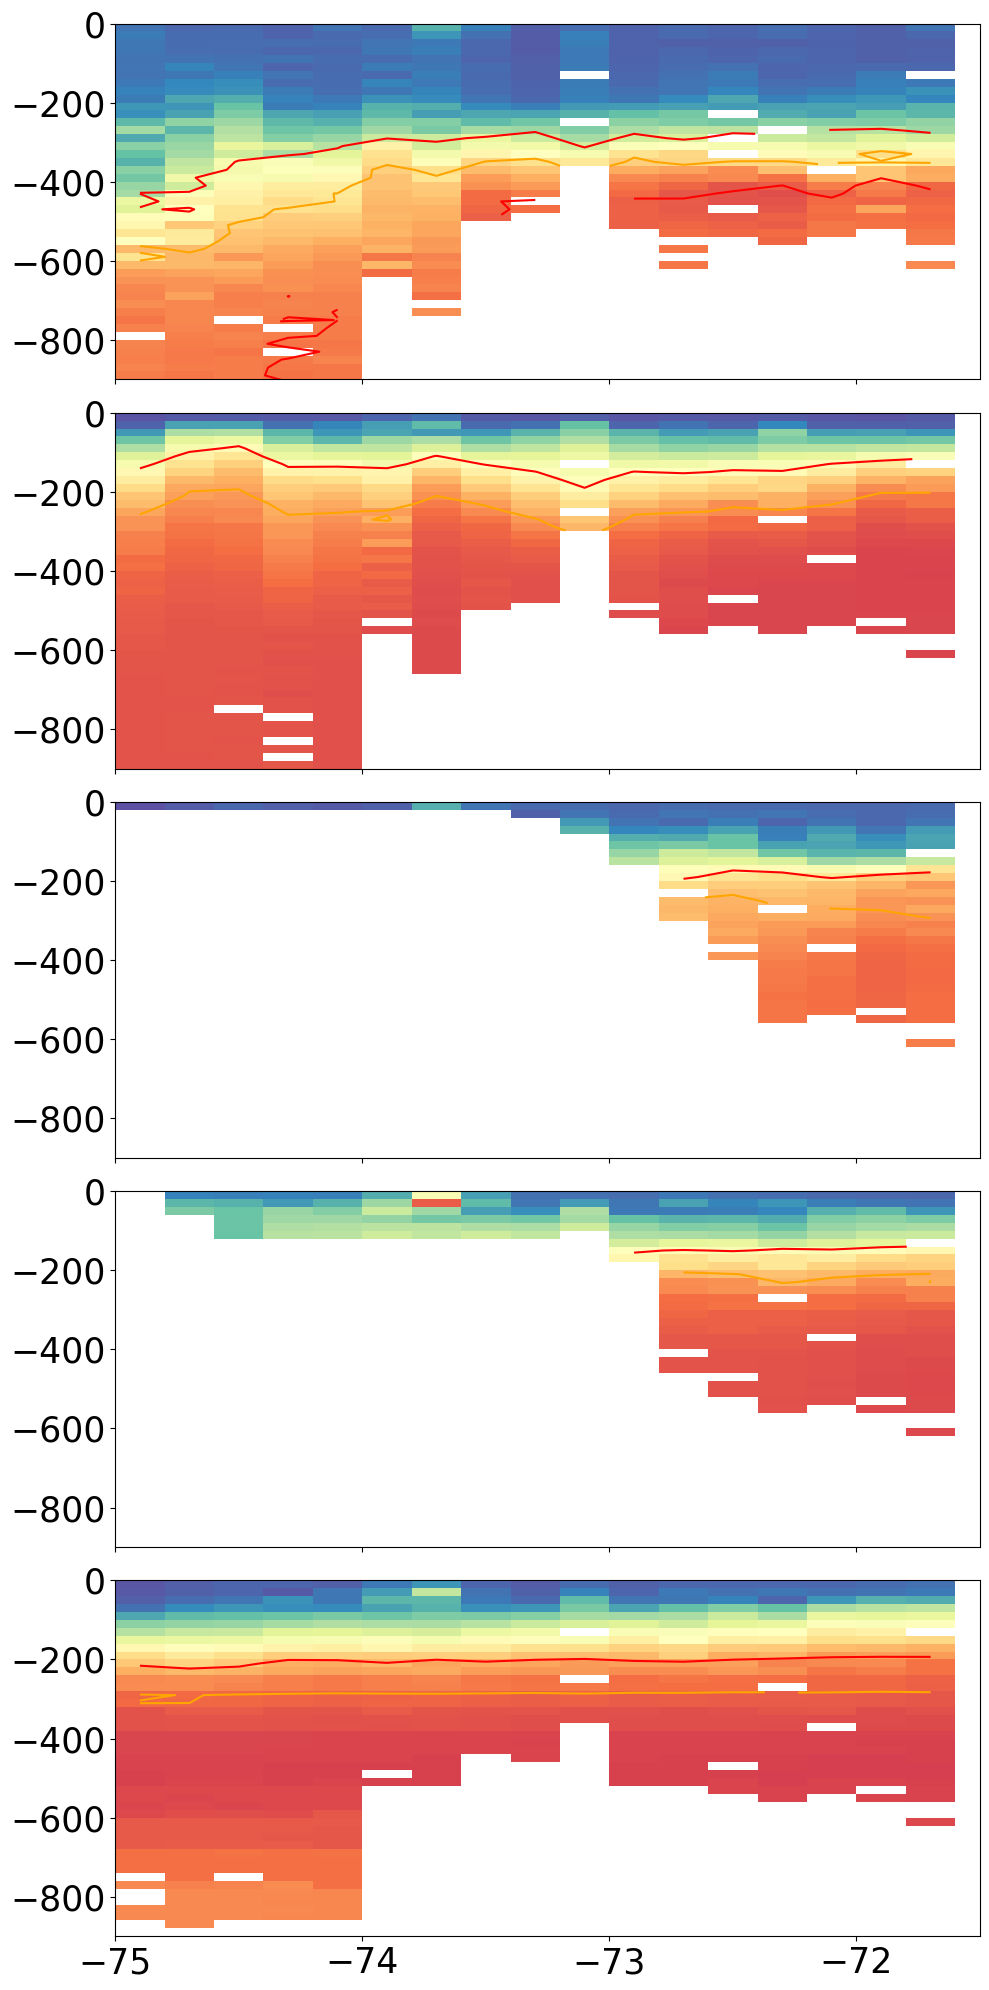

In [86]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5, sharex=True)

l = 255*2

im=ax[0].pcolormesh(YC[:], RC, meopT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[0].contour(YC[:], RC, meopS[:,:,l], levels=[34.3, 34.5, 34.7], colors=['red', 'orange'])

ax[1].pcolormesh(YC[:], RC, SOhiT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[1].contour(YC[:], RC, SOhiS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[2].pcolormesh(YC[:], RC, LLCT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[2].contour(YC[:], RC, LLCS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[3].pcolormesh(YC[:], RC, SOSET[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[3].contour(YC[:], RC, SOSES[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[4].pcolormesh(YC[:], RC, ECCOT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[4].contour(YC[:], RC, ECCOS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

for a in ax.flat:
    a.set_xlim(-75, -71.5)
    a.set_ylim(-900, 0)
    a.tick_params(axis='both', labelsize=25)
    
ax[4].set_xticks([-75, -74, -73, -72])
plt.tight_layout()
plt.savefig(f"img6_vertical_slice/amundsen.jpg", dpi=300)

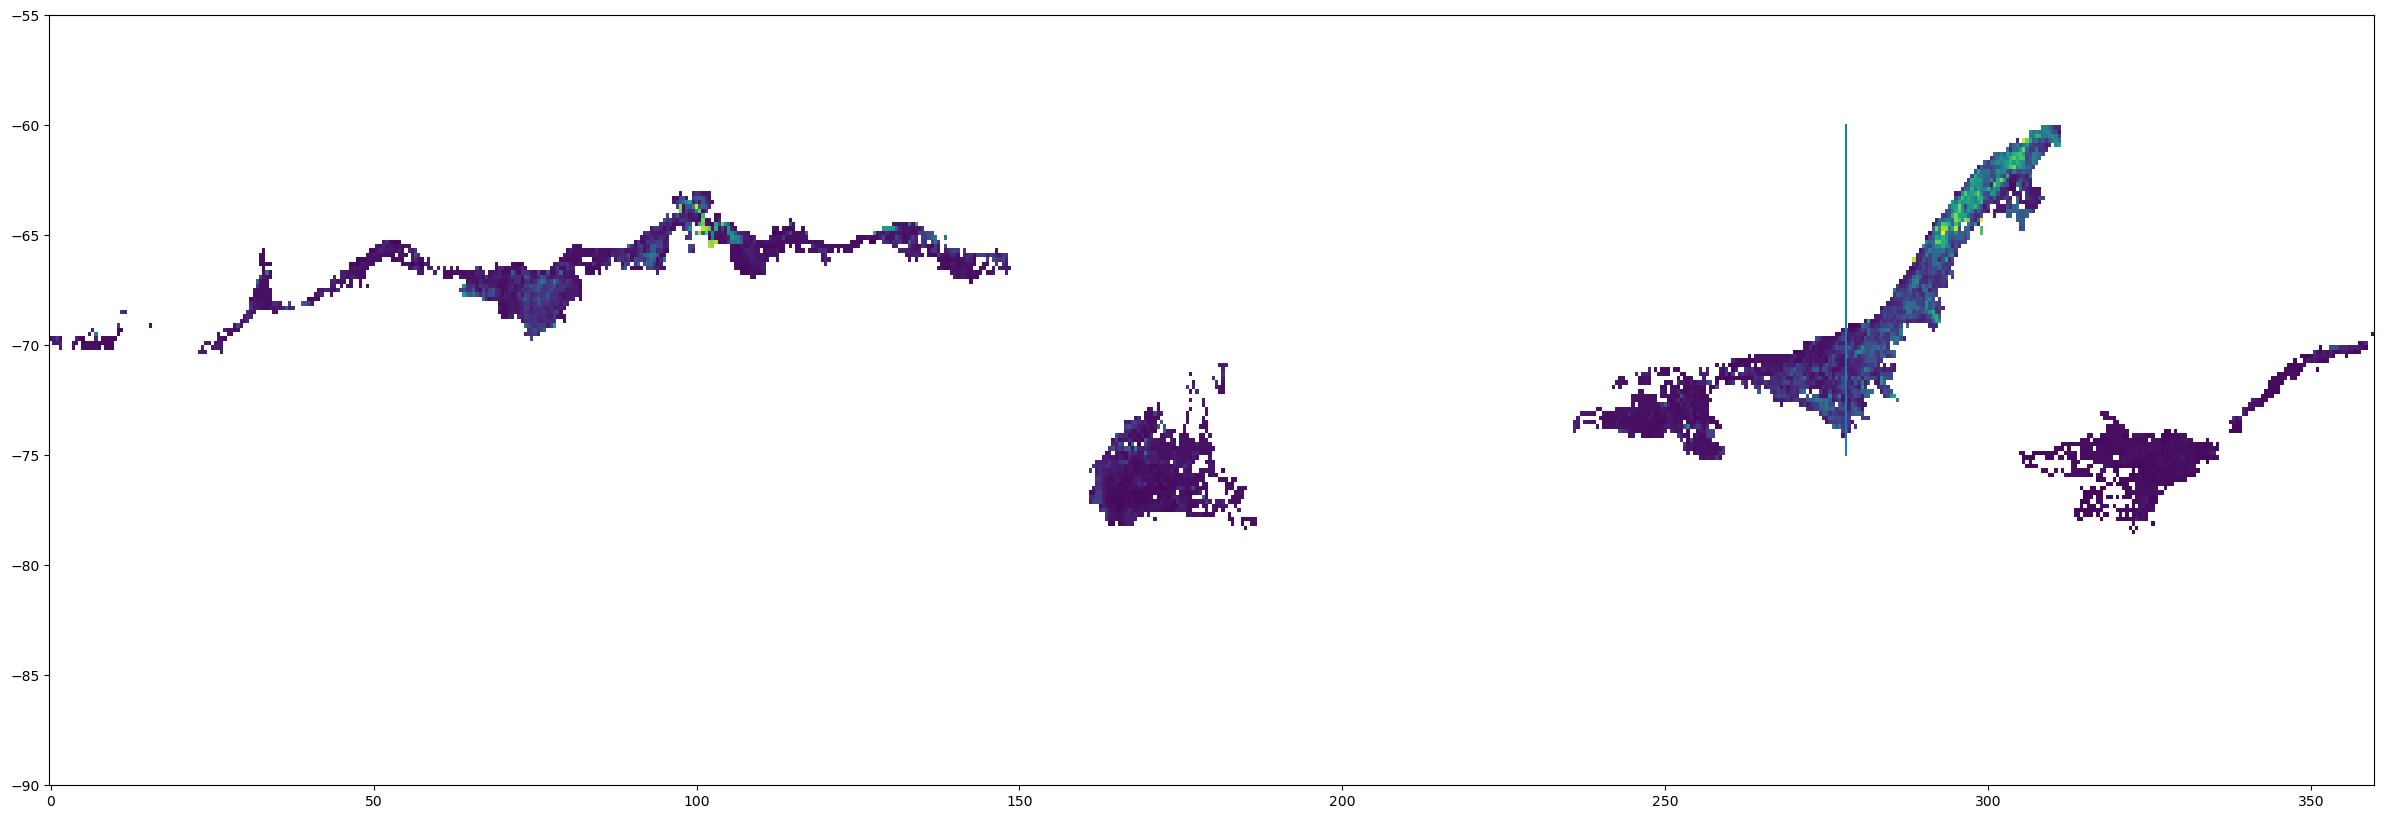

In [89]:
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(np.arange(0, 360, 0.5), YC, meopT[0])
ax.plot([278, 278],[-75, -60])

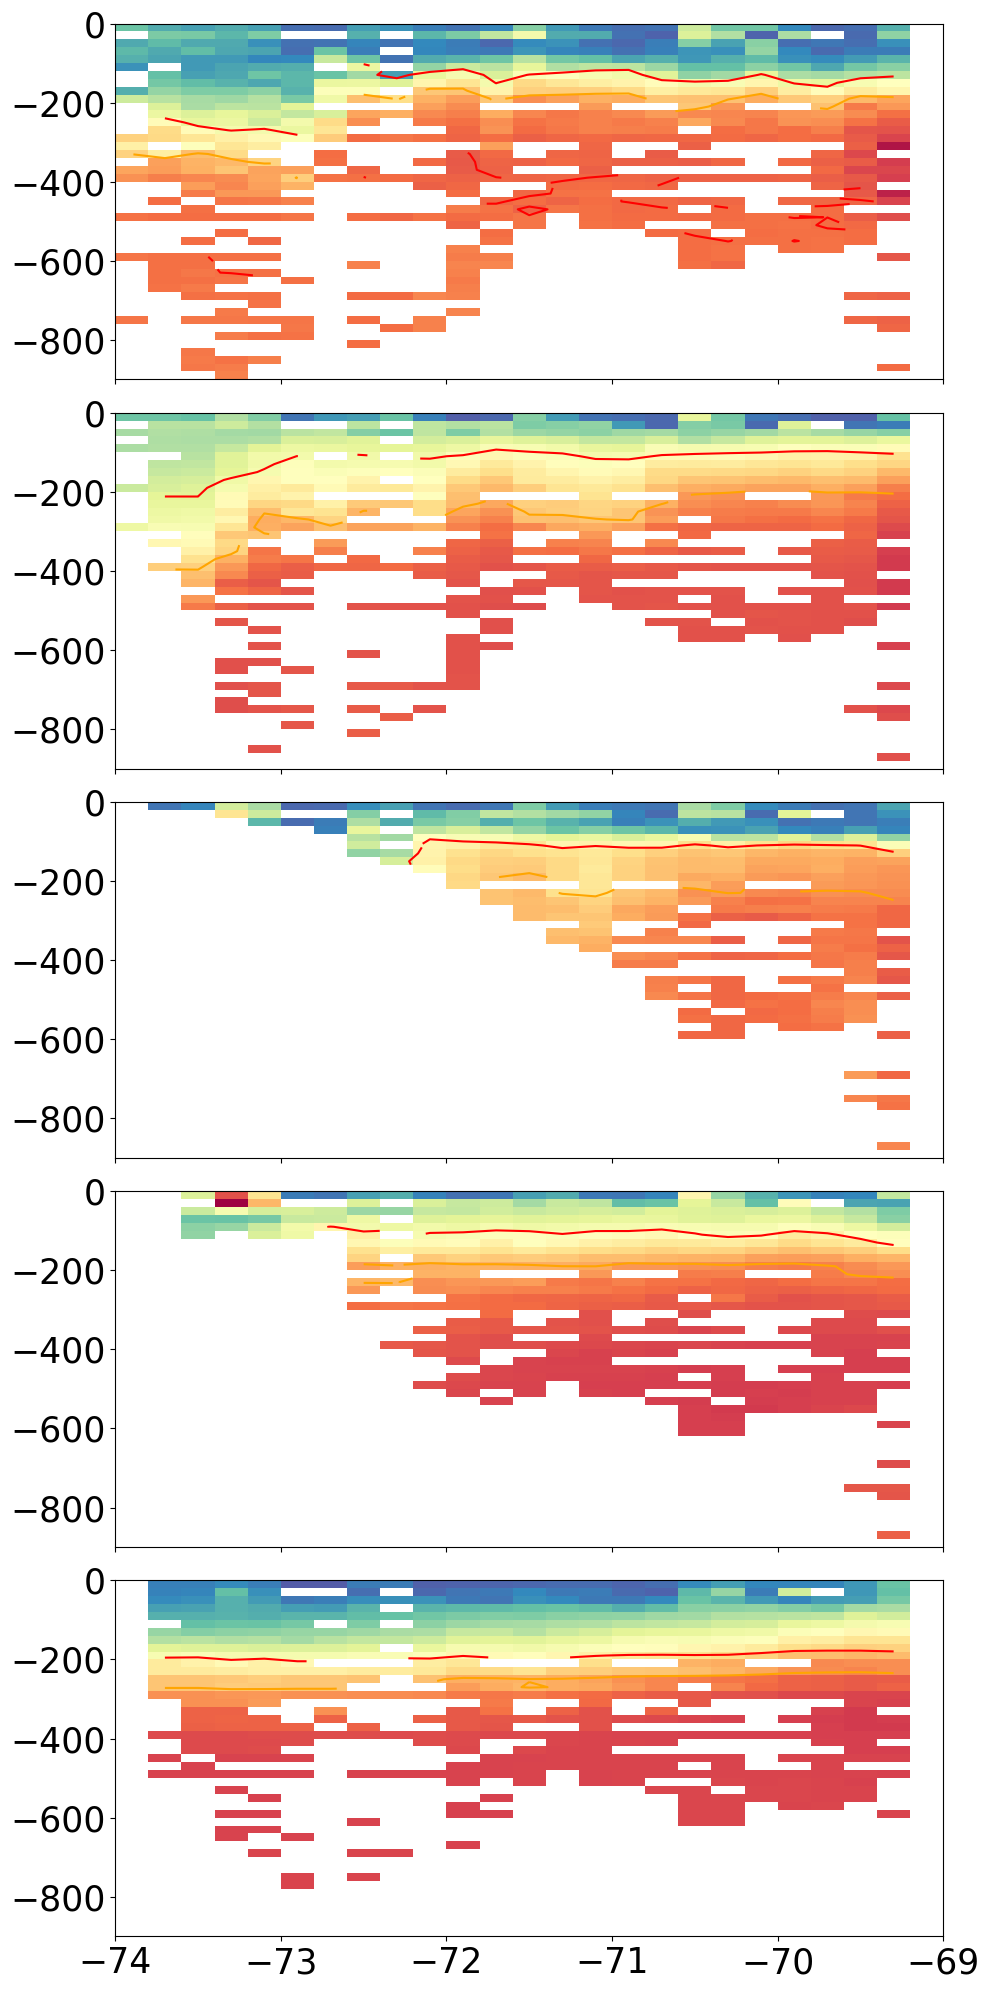

In [94]:
fig, ax = plt.subplots(figsize=(10,20), nrows=5, sharex=True)

l = 278*2

im=ax[0].pcolormesh(YC[:], RC, meopT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[0].contour(YC[:], RC, meopS[:,:,l], levels=[34.3, 34.5, 34.7], colors=['red', 'orange'])

ax[1].pcolormesh(YC[:], RC, SOhiT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[1].contour(YC[:], RC, SOhiS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[2].pcolormesh(YC[:], RC, LLCT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[2].contour(YC[:], RC, LLCS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[3].pcolormesh(YC[:], RC, SOSET[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[3].contour(YC[:], RC, SOSES[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

ax[4].pcolormesh(YC[:], RC, ECCOT[:,:,l], cmap='Spectral_r', vmin=-2, vmax=2)
ax[4].contour(YC[:], RC, ECCOS[:,:,l], levels=[34.3, 34.5], colors=['red', 'orange'])

for a in ax.flat:
    a.set_xlim(-74, -69)
    a.set_ylim(-900, 0)
    a.tick_params(axis='both', labelsize=25)
    
ax[4].set_xticks([-74, -73, -72, -71, -70, -69])
plt.tight_layout()
plt.savefig(f"img6_vertical_slice/bellingshausen.jpg", dpi=300)